## Problem Statement

> An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  

> The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

>Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:




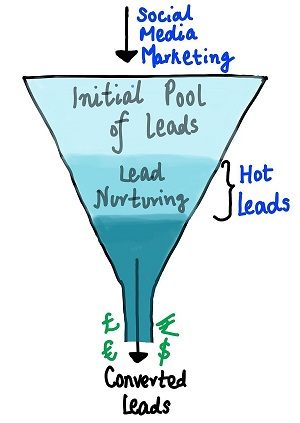










> As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 
> X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

> Goal: Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


#### Importing all the necesarry libraries

In [1]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
lead = pd.read_csv('leads.csv')

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking for any duplicates 
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


> There are no duplicate values in each column.

### DATA CLEANING

#### As 'Prospect ID' is an index column and, does not affect the dataframe if dropped, so dropping it.. 	

In [8]:
lead = lead.drop(['Prospect ID' ], axis = 1)

> We can see there multiple spaces filled with Select, to my understanding they are values in which user did not specify or did not share the information, therefore considering it to be Null values can be replaced with NaN Values.

In [9]:
#replacing Selecct values with NAN

lead = lead.replace('Select', np.nan)

In [10]:
#Checking for null values

null_lead = round((lead.isna().sum())/len(lead.index)* 100, 2)
print(null_lead[null_lead > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City                                             39.71
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


##### Dropping the columns whose missing values are greater than 50%, however keeping Lead Quality column.

In [11]:
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>52)].columns, 1)


In [12]:
lead.head(5)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
#Checking the unique values for all columns

for i in lead.columns:
    print(i+':', len(lead[i].unique()))

Lead Number: 9240
Lead Origin: 5
Lead Source: 22
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 42
Total Time Spent on Website: 1731
Page Views Per Visit: 115
Last Activity: 18
Country: 39
Specialization: 19
What is your current occupation: 7
What matters most to you in choosing a course: 4
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 27
Lead Quality: 6
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
City: 7
Asymmetrique Activity Index: 4
Asymmetrique Profile Index: 4
Asymmetrique Activity Score: 13
Asymmetrique Profile Score: 11
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [14]:
#Dropping the columns which are constant and are not of much relevance. 
#lead = lead.drop(['I agree to pay the amount through cheque', 'Get updates on DM Content', 
#                  'Update me on Supply Chain Content',
#                 'Receive More Updates About Our Courses', 'Magazine'], axis = 1)

In [15]:
# Function for percentage plots
def plot_percent(var):
    values = (lead[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('Pastel1'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

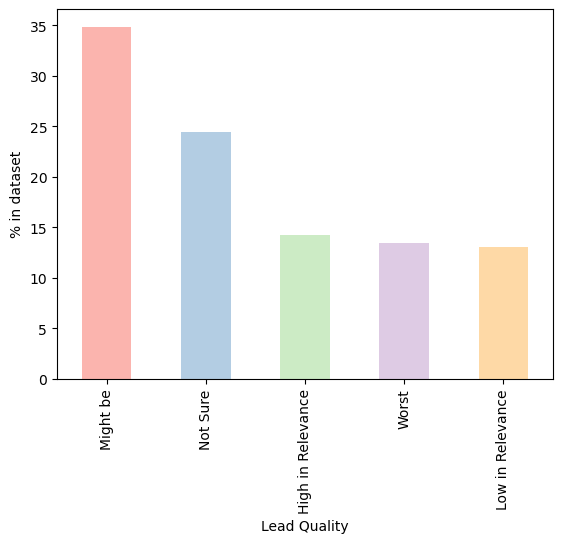

In [16]:
# For Lead Quality
plot_percent('Lead Quality')

> Null values in  'Lead Quality' column can be imputed with the value 'Not Sure' as we can assume that not filling in a column means the employee does not know or is not sure about the option.



In [17]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

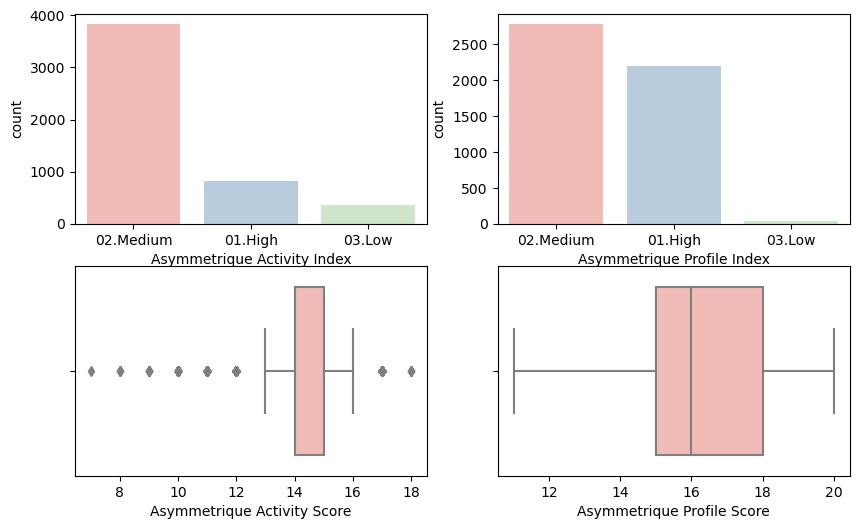

In [18]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asymm_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
              'Asymmetrique Profile Score']
plt.figure(figsize=(10, 6))

for i in asymm_list:
    plt.subplot(2,2,asymm_list.index(i)+1)
    if 'Index' in i:
        sns.countplot(lead[i], palette ='Pastel1')
    else:
        sns.boxplot(lead[i],  palette ='Pastel1')
plt.show()

In [19]:
lead[asymm_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


>These four variables have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. 
Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model. We'll have to drop these variables.

In [20]:
lead = lead.drop(asymm_list, axis=1)

In [21]:
lead

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,No,No,Ringing,Not Sure,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,No,No,Will revert after reading the email,High in Relevance,No,No,Mumbai,No,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,No,No,wrong number given,Might be,No,No,Mumbai,No,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,No,No,invalid number,Not Sure,No,No,Mumbai,No,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,No,No,NaN,Not Sure,No,No,Other Metro Cities,No,No,SMS Sent


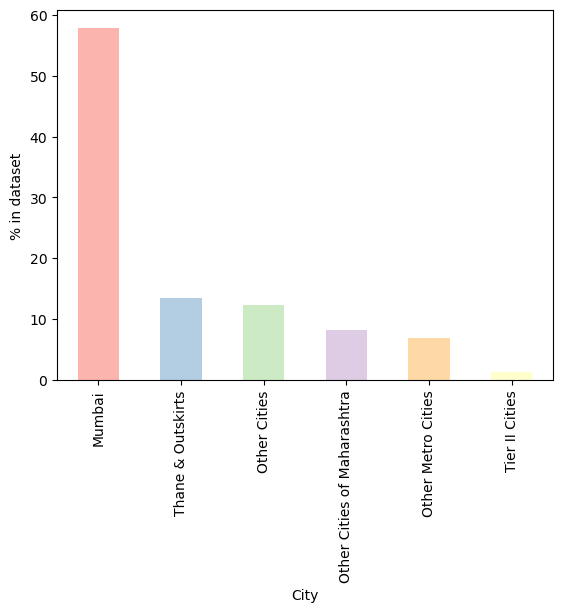

In [22]:
# For 'City'
plot_percent('City')


> Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [23]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

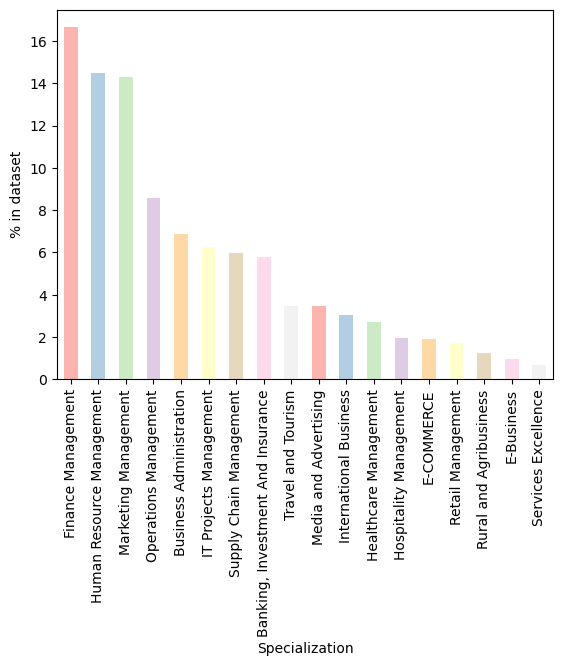

In [24]:
# For 'Specialization'
plot_percent('Specialization')

> There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column for that.

In [25]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')


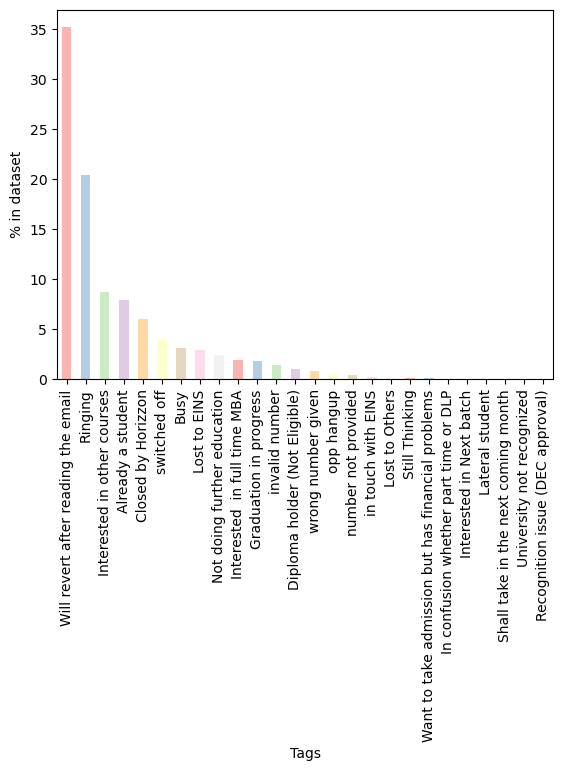

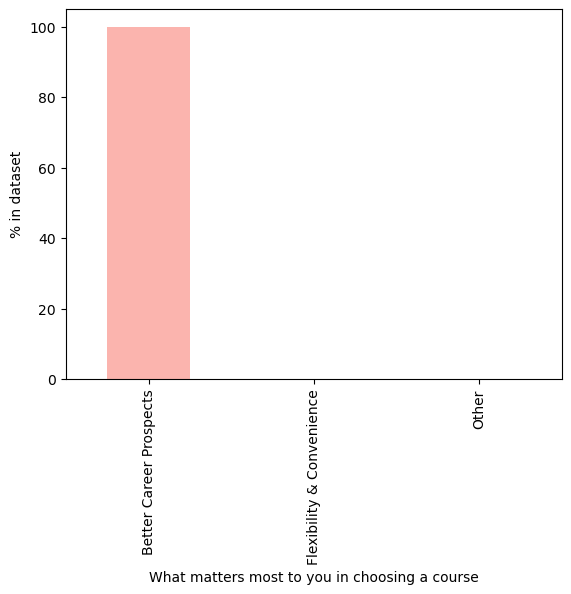

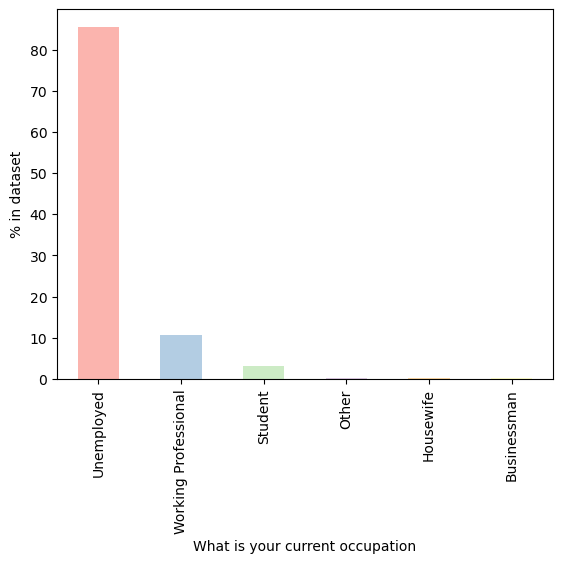

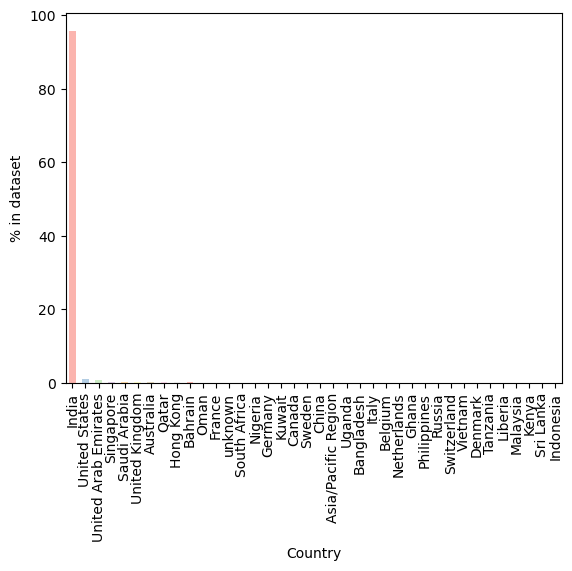

In [26]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for x in var_list:
    plot_percent(x)
    plt.show()


In [27]:
# To impute with the most frequent value
for x in var_list:
    top_frequent = lead[x].describe()['top']
    lead[x] = lead[x].replace(np.nan, top_frequent)

In [28]:
# To get percentage of null values in each column
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

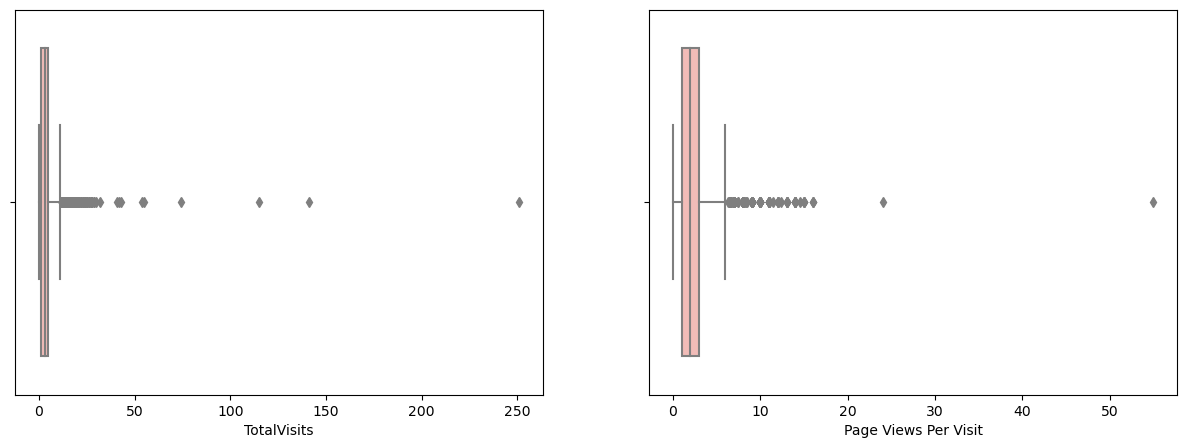

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [29]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for x in visit_list:
    plt.subplot(1,2,visit_list.index(x)+1)
    sns.boxplot(lead[x], palette='Pastel1')
plt.show()

lead[visit_list].describe()

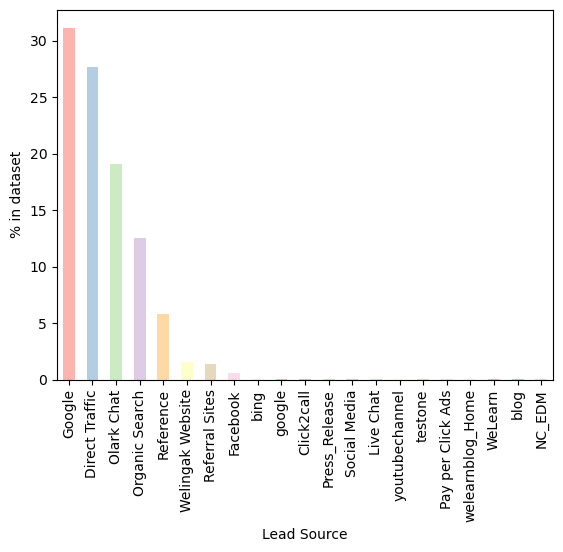

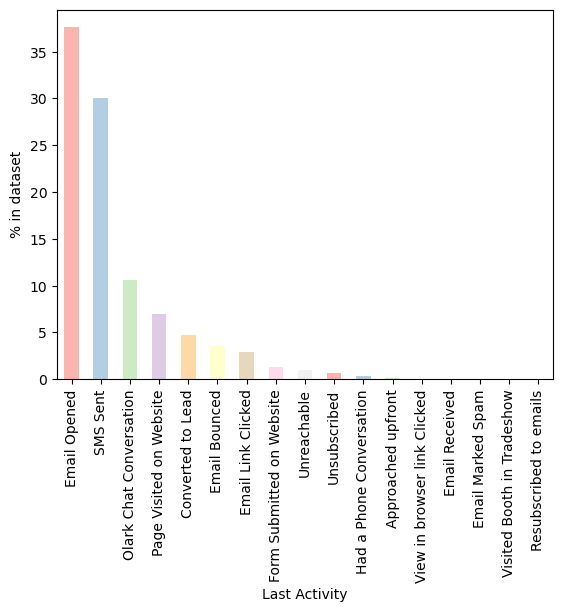

In [30]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for x in var_list:
    plot_percent(x)
    plt.show()

>In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. 
Hence, we'll drop the rows containing any missing missing values for above four variables

In [31]:
# To drop the rows containing missing value
lead.dropna(inplace = True)

In [32]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

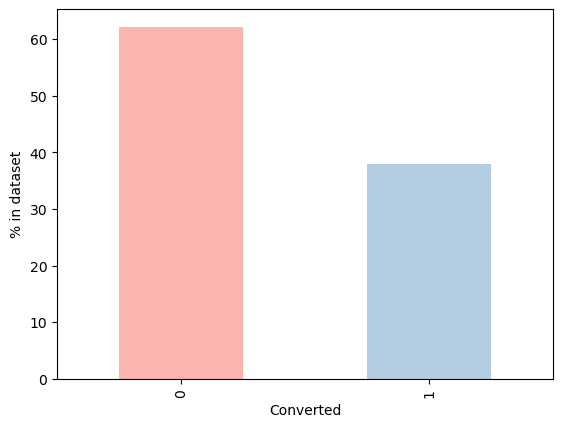

In [33]:
#Let's check for the target variable
plot_percent('Converted')

In [34]:
(sum(lead['Converted'])/len(lead['Converted'].index))*100

37.85541106458012

>37.8% of the 'Converted' data is 1 ie. 37.8% of the leads are converted. This means we have enough data of converted leads for modelling.

##### VISUALIZING  NUMERICAL VARIABLES

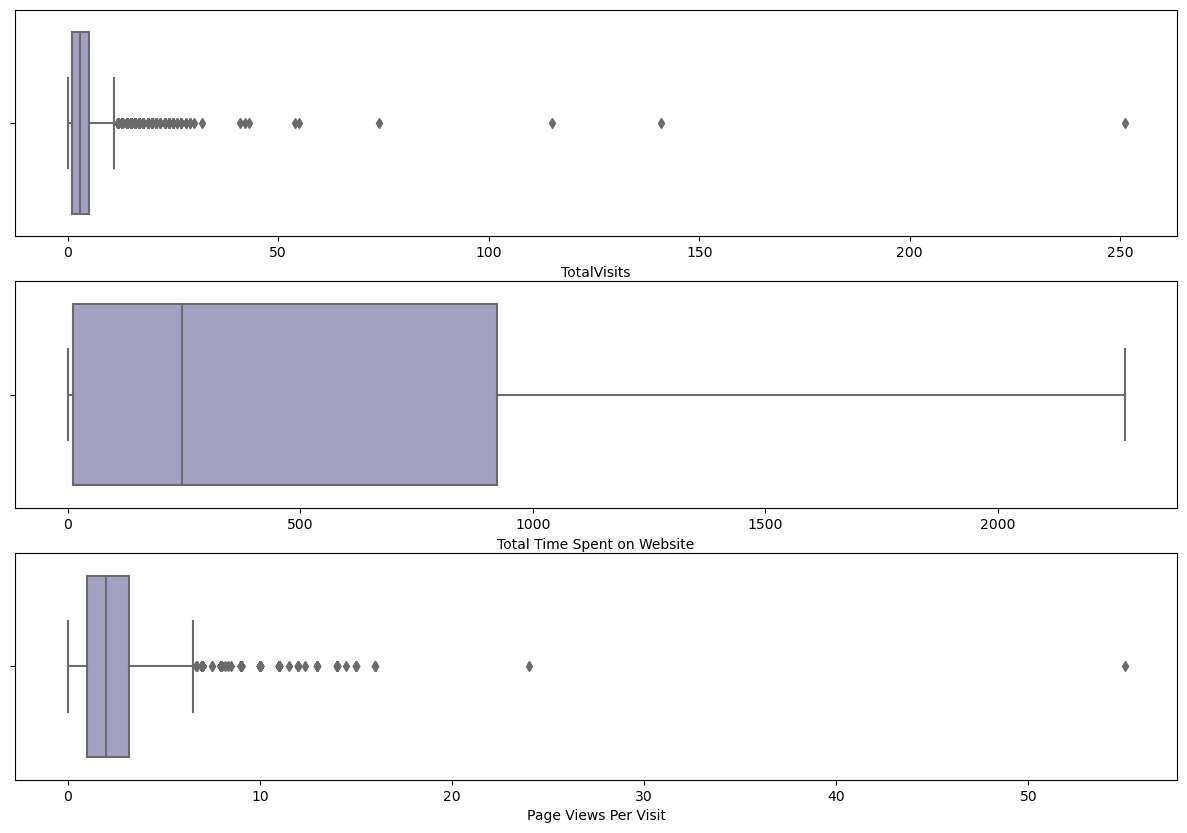

In [35]:
# Boxplots
numeric_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))

for x in numeric_var:
    plt.subplot(3,1,numeric_var.index(x)+1)
    sns.boxplot(lead[x], palette = 'Purples_r')
plt.show()

In [36]:
lead[numeric_var].describe([0.05,.25, .5, .75, .90, .95])
 

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


>From the boxplots, we can see that there are outliers present in the variables.

>For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we can  cap these outliers at 95% value. 

>There are no significant outliers in 'Total Time Spent on Website' for 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

##### We don't need to cap at 5% as the minimum value at 5% value are same for all the variables.


In [37]:
#Treating the outliers

percentile = lead['TotalVisits'].quantile([0.95]).values
lead['TotalVisits'][lead['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = lead['Page Views Per Visit'].quantile([0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentile[0]] = percentile[0]


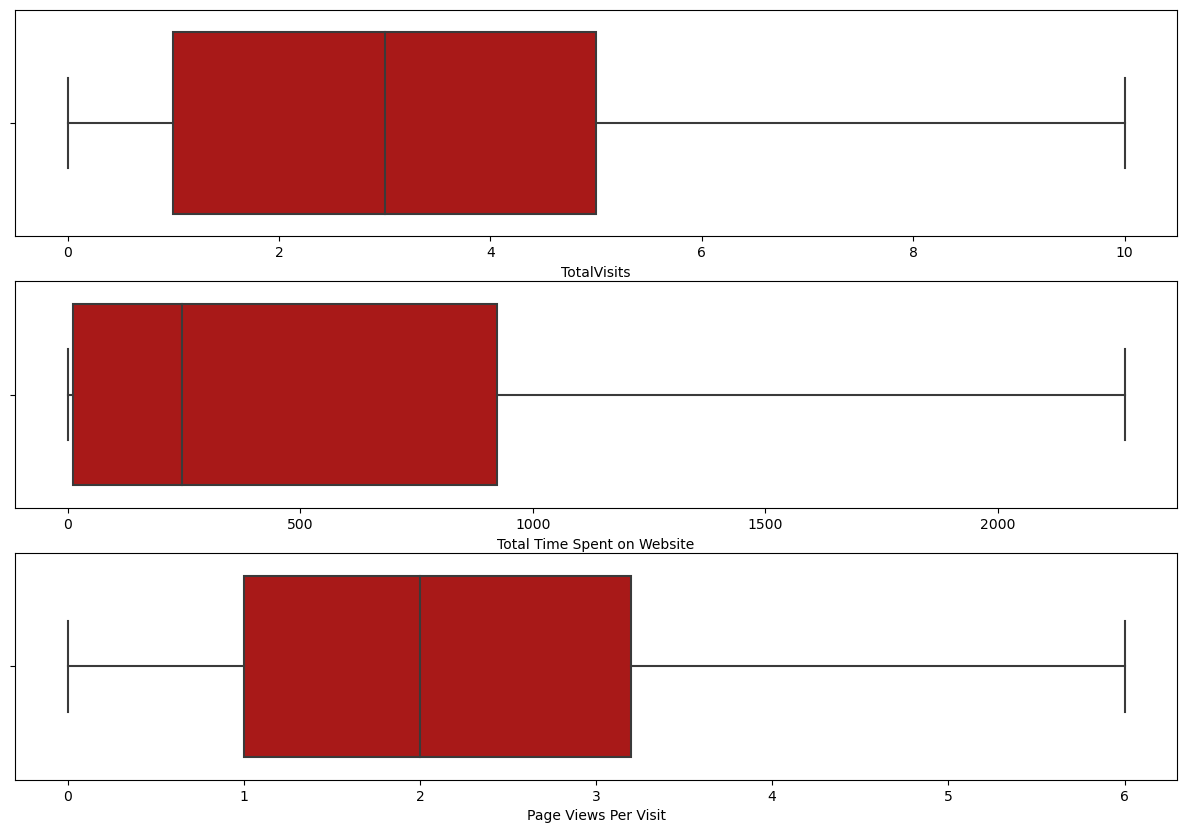

In [38]:
# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))

for x in numeric_var:
    plt.subplot(3,1,numeric_var.index(x)+1)
    sns.boxplot(lead[x], palette = 'gist_heat')
plt.show()


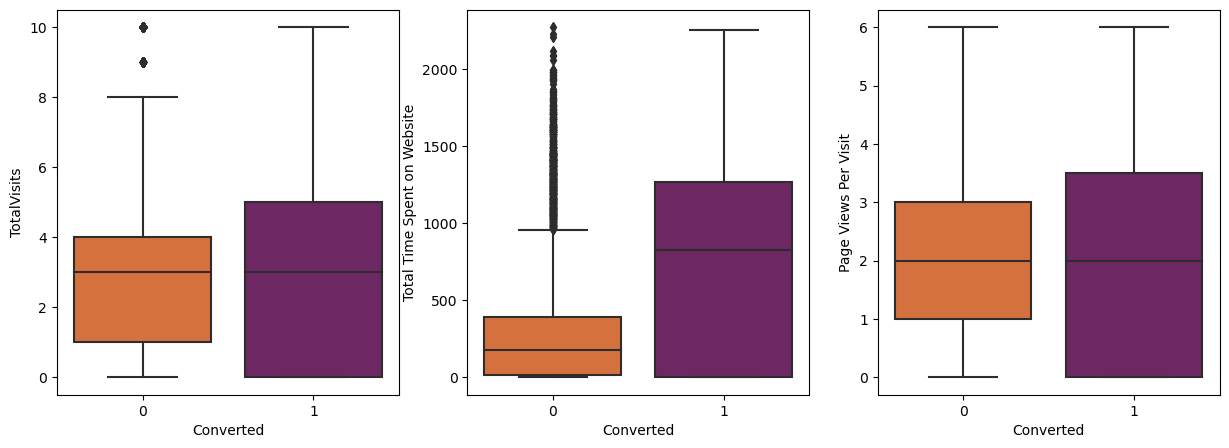

In [39]:
# To plot numerical variables against target variable to analyse relations
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for var in numeric_var:
    plt.subplot(1,3,numeric_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = lead, palette = 'inferno_r' )
plt.show()

> Observations:
>1) 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drawn from this.

> 2) People spending more time on the website are more likely to be converted, this is also aligned with our general knowledge.

> 3) 'Page Views Per Visit' also has same median values for both outputs of leads and hence are inconclusive.

##### Visualising Categorical Variables

In [40]:
# Categorical variables
categ_var = list(lead.columns[lead.dtypes == 'object'])
categ_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

> We saw percentage plots for categorical variables while cleaning the data. Here, we'll see these plots with respect to target variab. 'Converted'.

In [41]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_categ_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = lead, palette = 'twilight')
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_categ_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = lead, palette = 'nipy_spectral_r')
        plt.xticks(rotation = 90)
    plt.show()

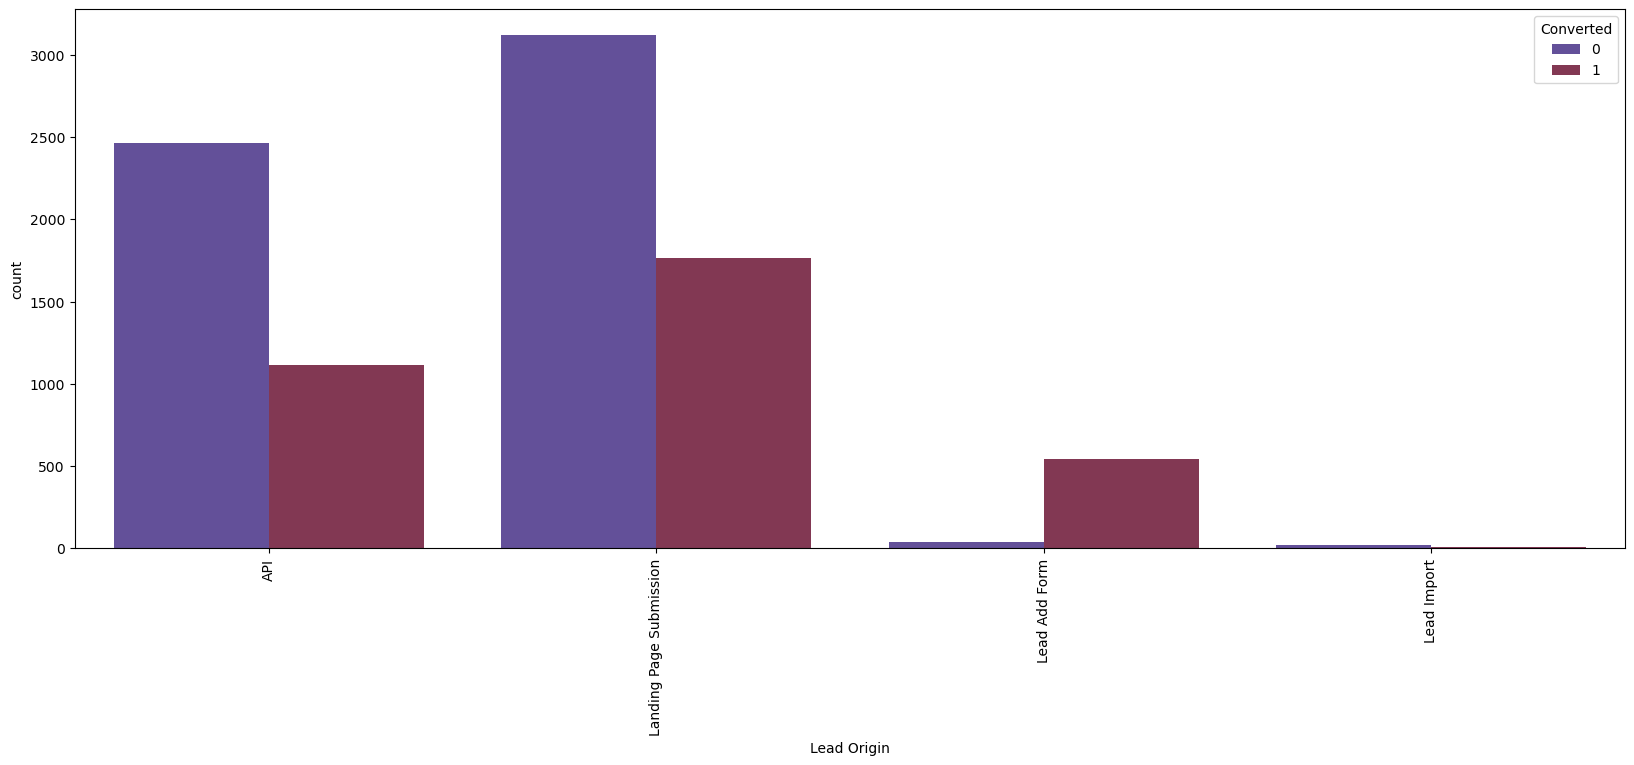

In [42]:
plot_categ_var(categ_var[0])

> Observations for Lead Origin :'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 
'Lead Import' does not seem very significant.

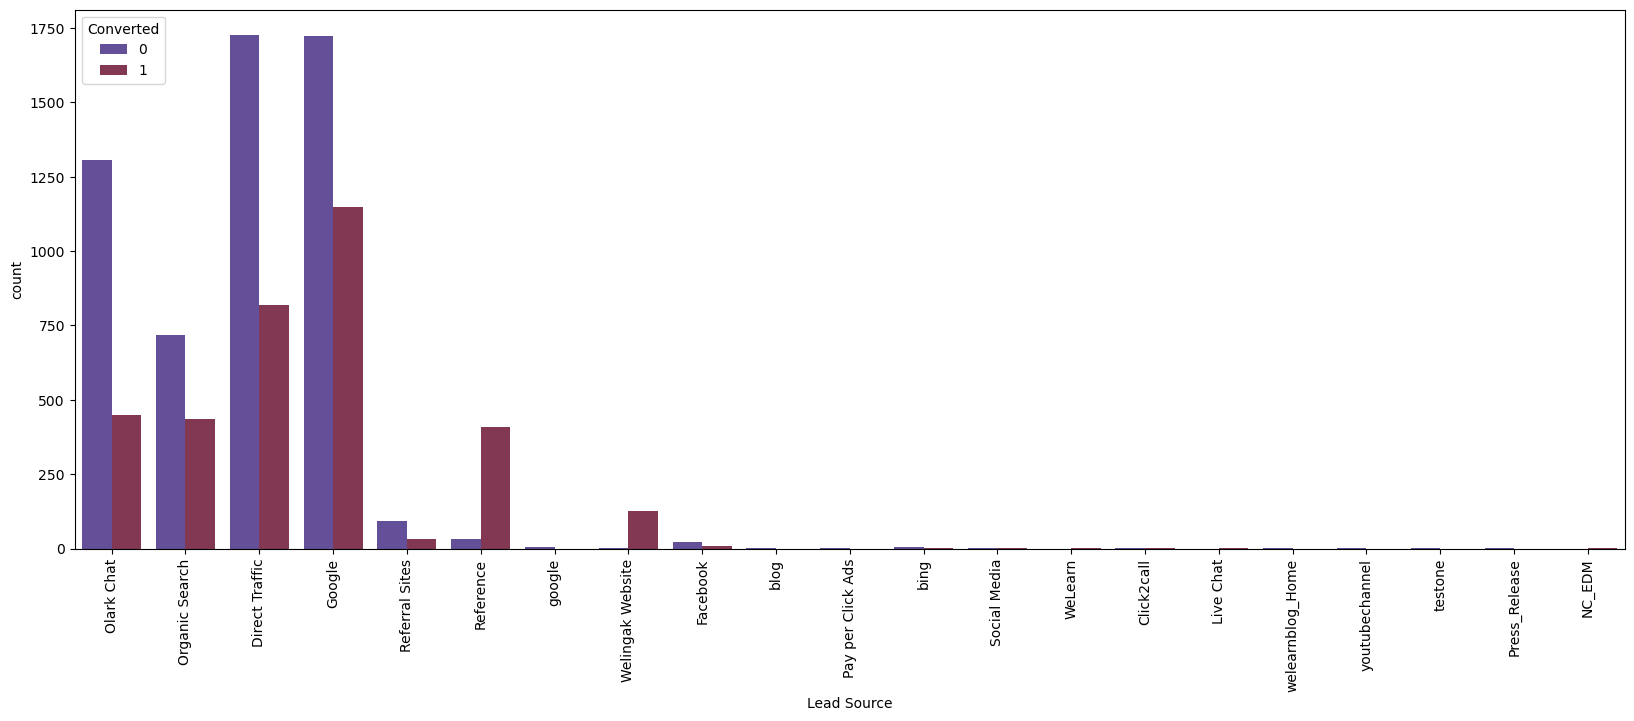

In [43]:
plot_categ_var(categ_var[1])

> Observations for Lead Source :

1) Spelling error: We've to change 'google' to 'Google'.

2) As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.

3) 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [44]:
# To correct spelling error
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [45]:
categories = lead['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

> We can see that we require first eight categories.

In [46]:
# To reduce categories
lead['Lead Source'] = lead['Lead Source'].replace(categories[8:], 'Others')


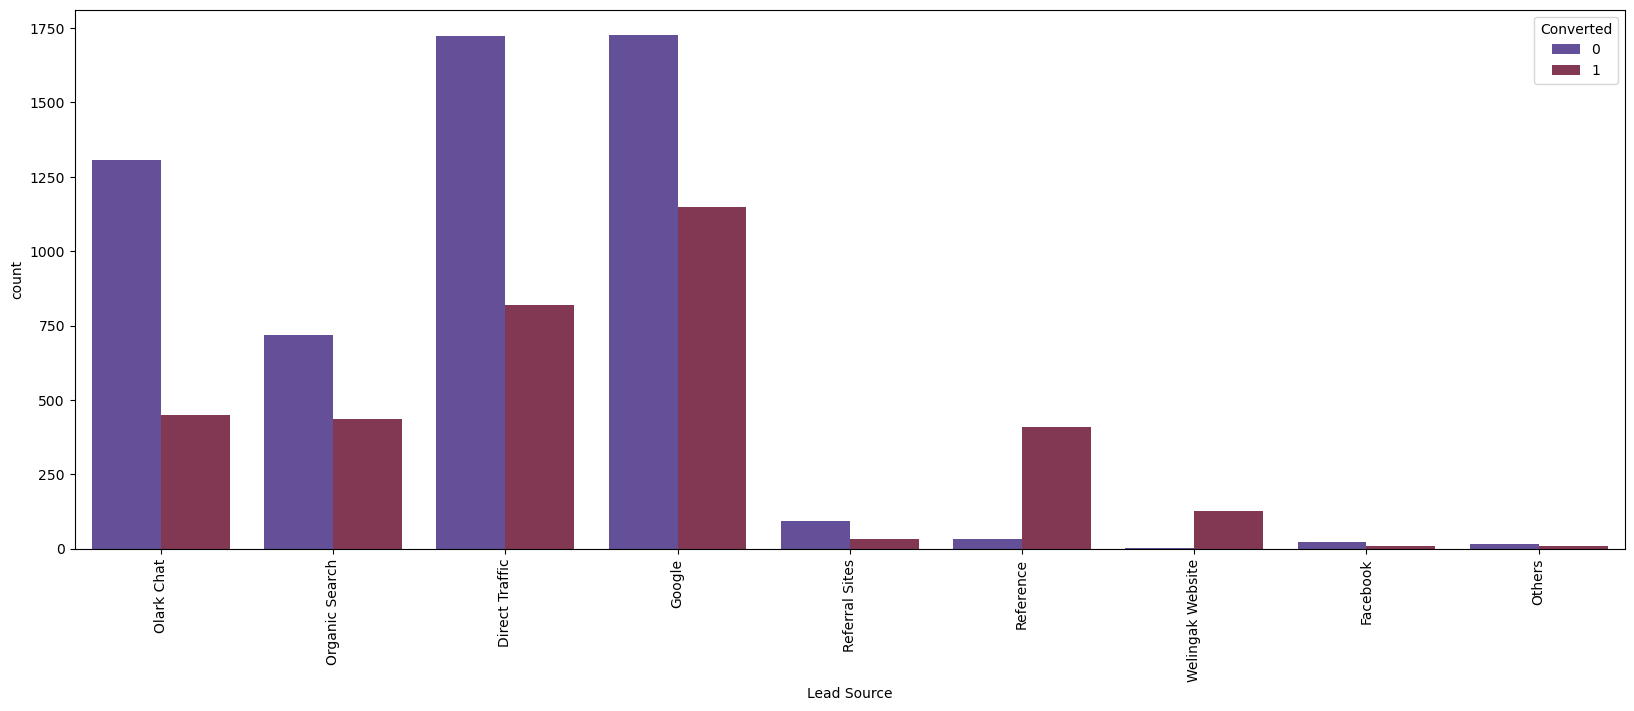

In [47]:
# To plot new categories
plot_categ_var(categ_var[1])

> Observations for Do Not Email and Do Not Call :

> As one can see, most of the responses are 'No' for both the variables which generated most of the leads.

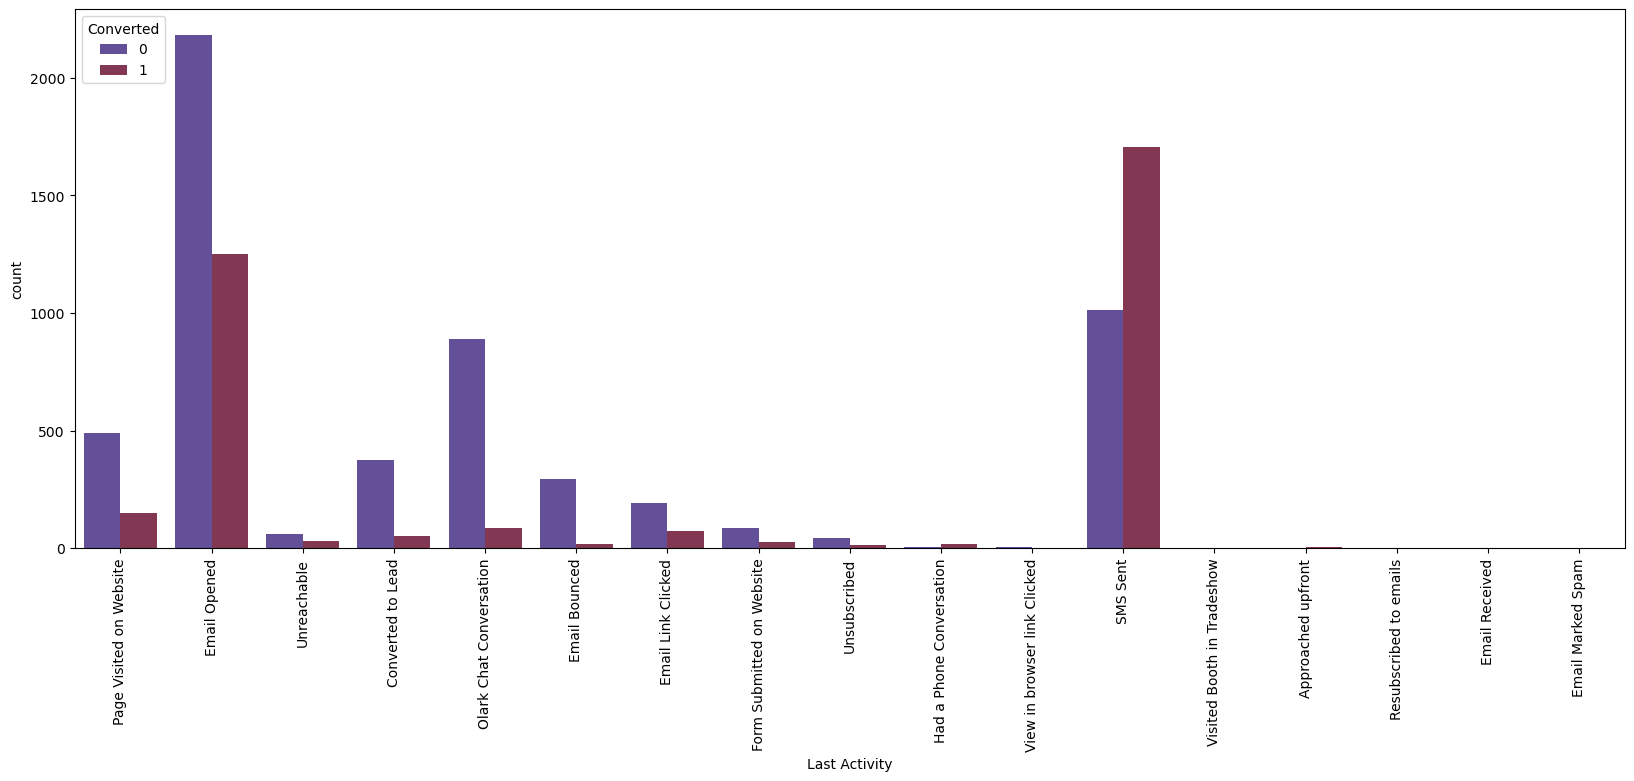

In [48]:
plot_categ_var(categ_var[4])

> Observations for Last Activity :

1) Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. 

2) Its conversion rate is significantly high.

3) Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [49]:
categories = lead['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

> We can see that we do not require last five categories.

In [50]:
lead['Last Activity'] = lead['Last Activity'].replace(categories[-5:], 'Others')

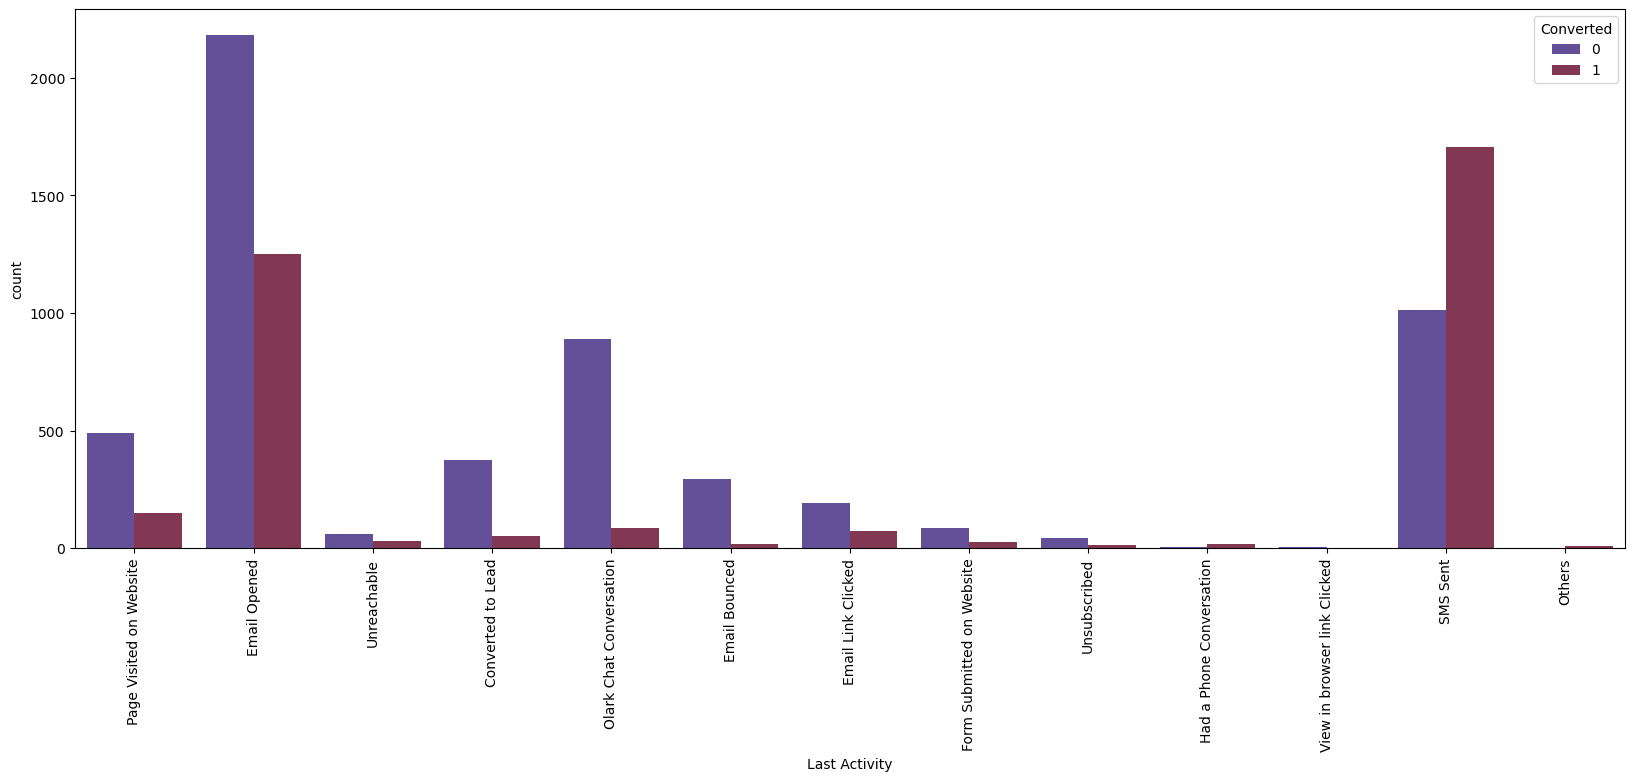

In [51]:
# To plot new categories
plot_categ_var(categ_var[4])

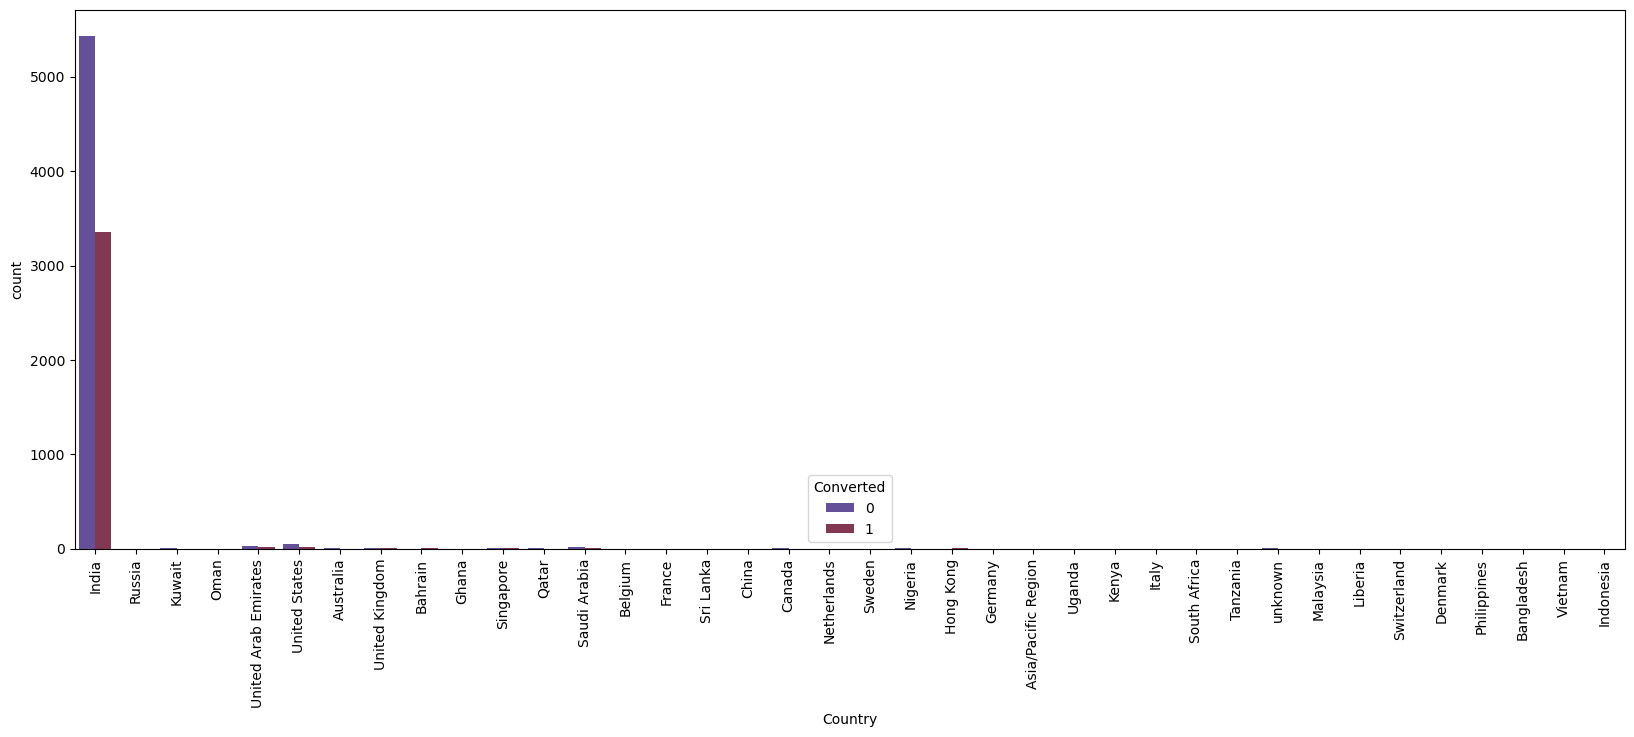

In [52]:
plot_categ_var(categ_var[5])

>Observations for Country : Most of the responses are for India and others are not significant.

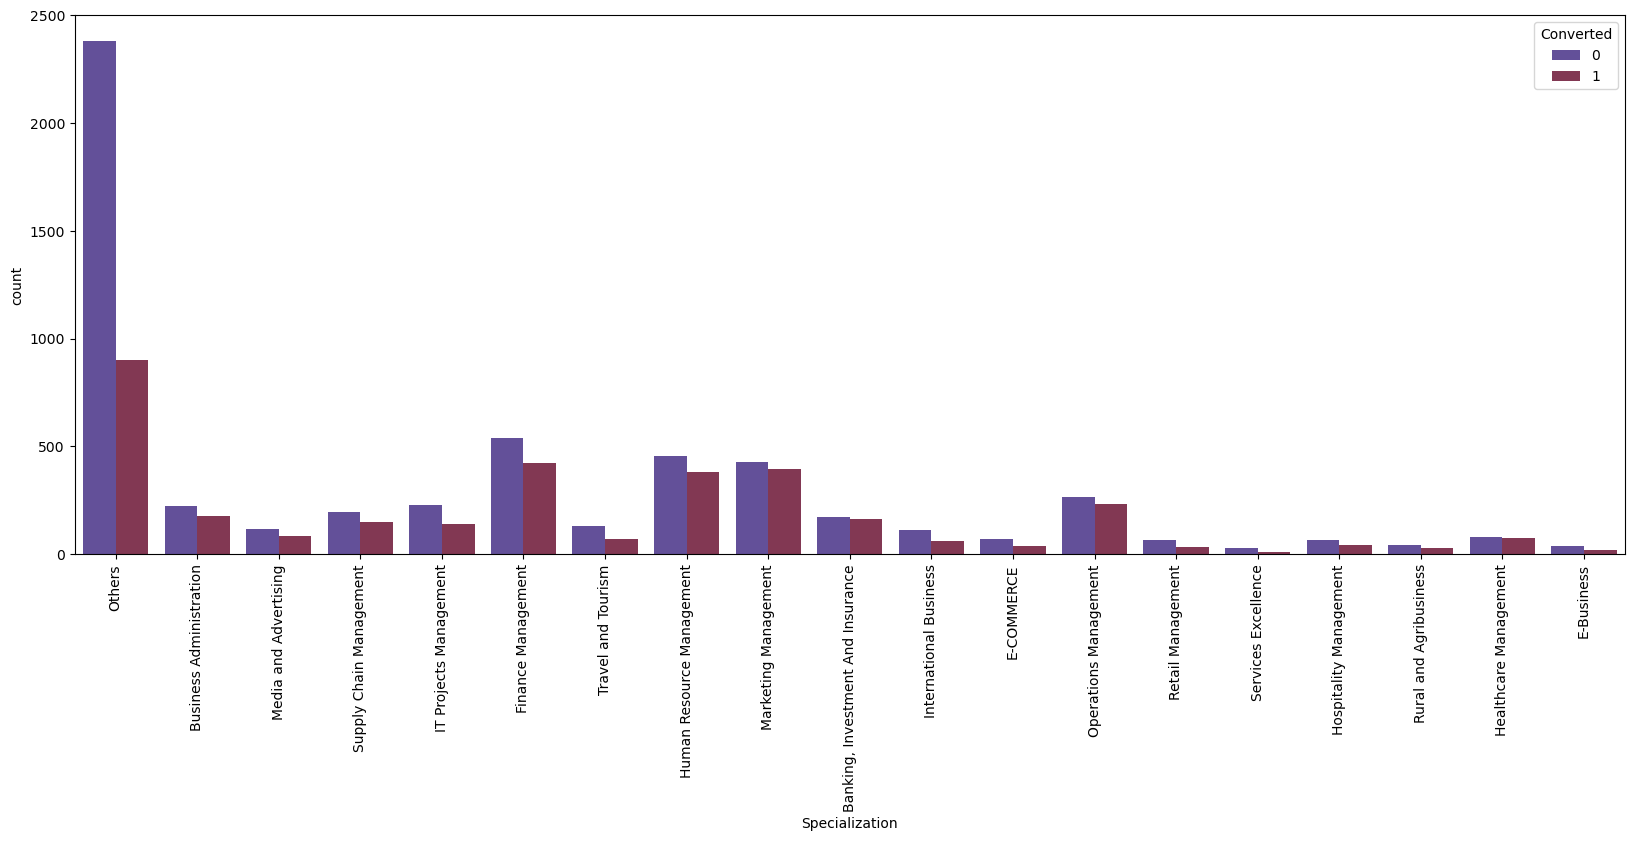

In [53]:
plot_categ_var(categ_var[6])

> Observations for Specialization : Conversion rates are mostly similar across different specializations.

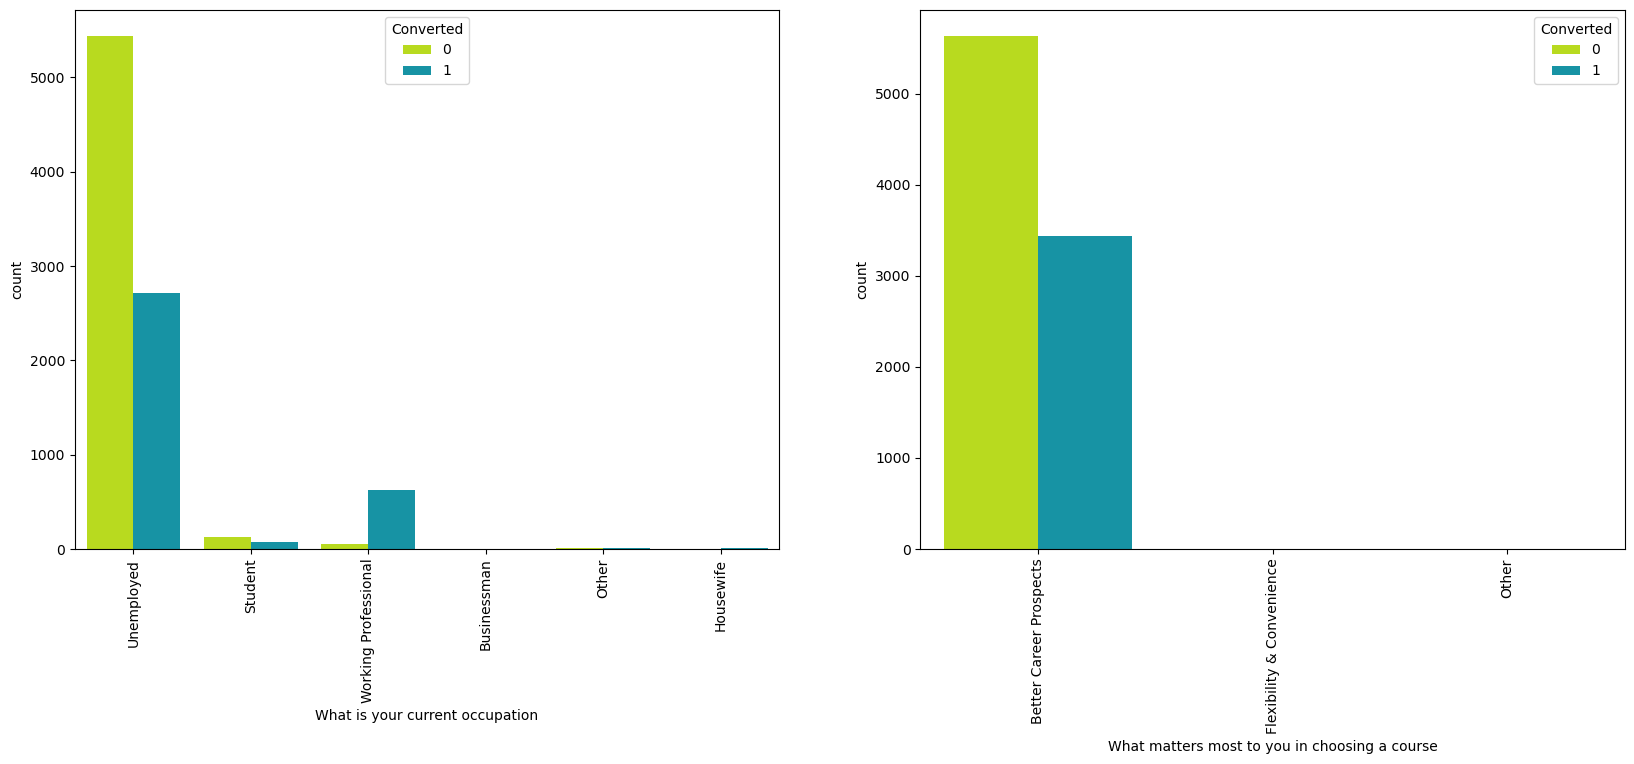

In [54]:
plot_categ_vars([categ_var[7], categ_var[8]])


> Observations for What is your current occupation and What matters most to you in choosing a course :
1) The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.

2) Variable 'What matters most to you in choosing a course' has only one category with significant count.

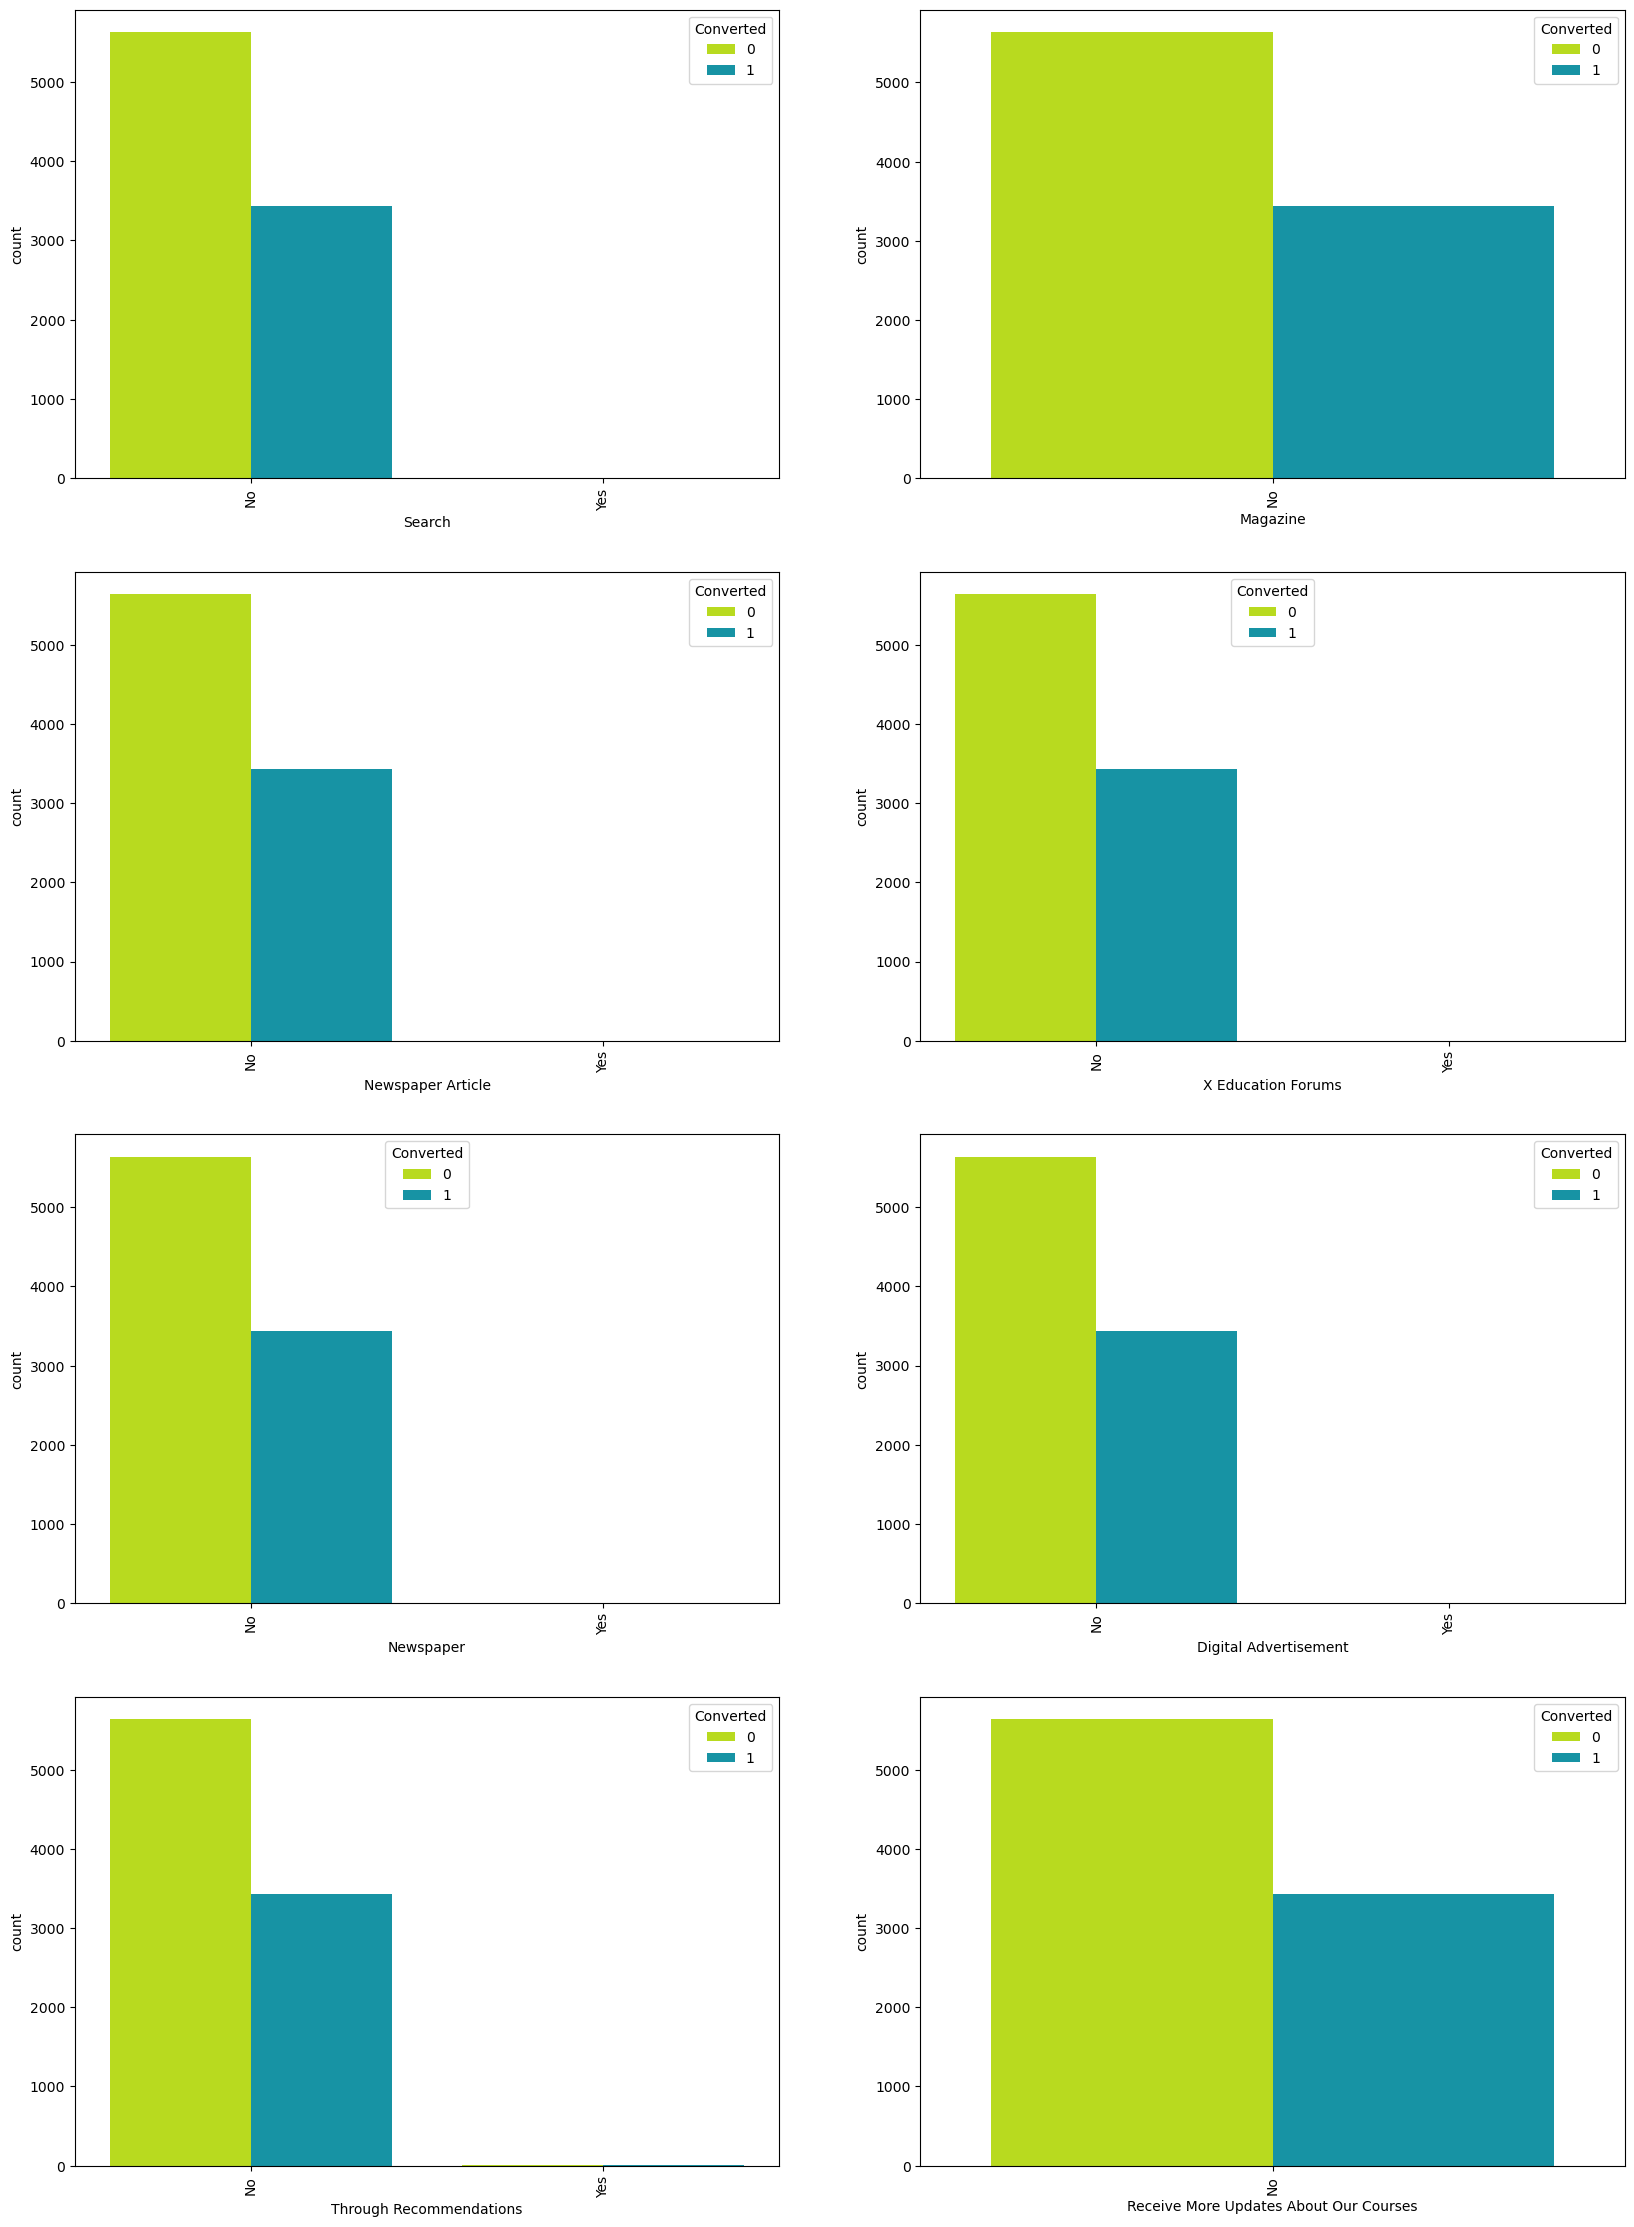

In [55]:
plot_categ_vars(categ_var[9:17])

> Observations for Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses: as all the above variables have most of the values as no, nothing significant can be inferred from these plots.

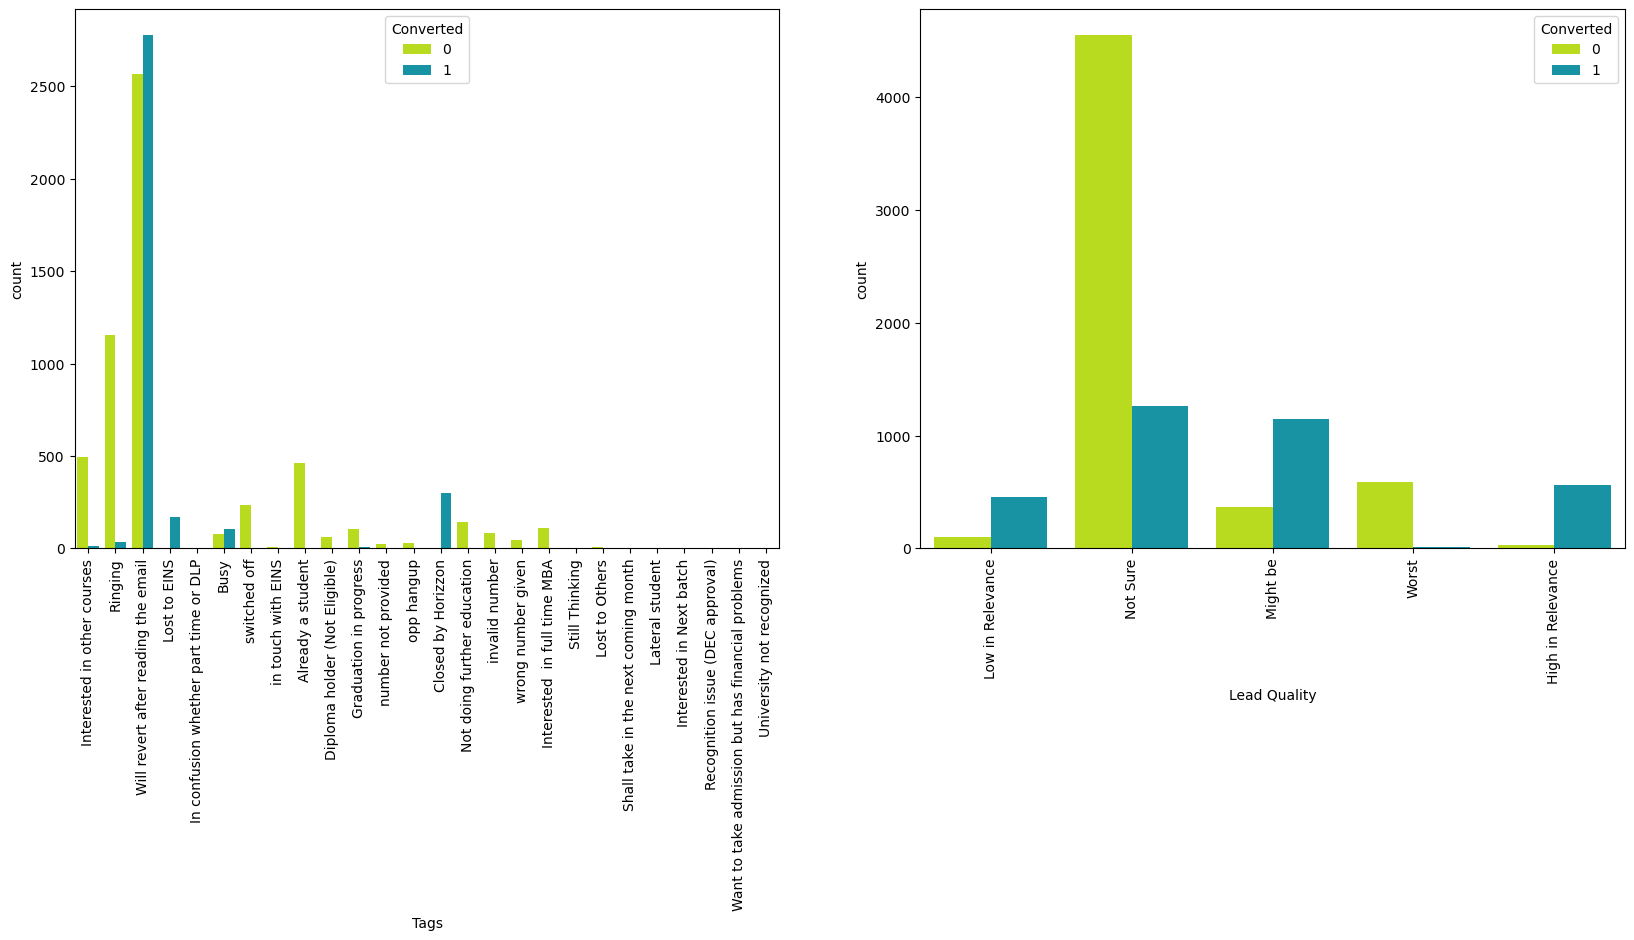

In [56]:
plot_categ_vars([categ_var[17],categ_var[18]])


> Observations for Tags and Lead Quality:

> In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category. 

>Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'. 

>In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Worst' has the lowest.

In [57]:
categories = lead['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

> We can combine that last eight categories.

In [58]:
# To reduce categories
lead['Tags'] = lead['Tags'].replace(categories[-8:], 'Others')

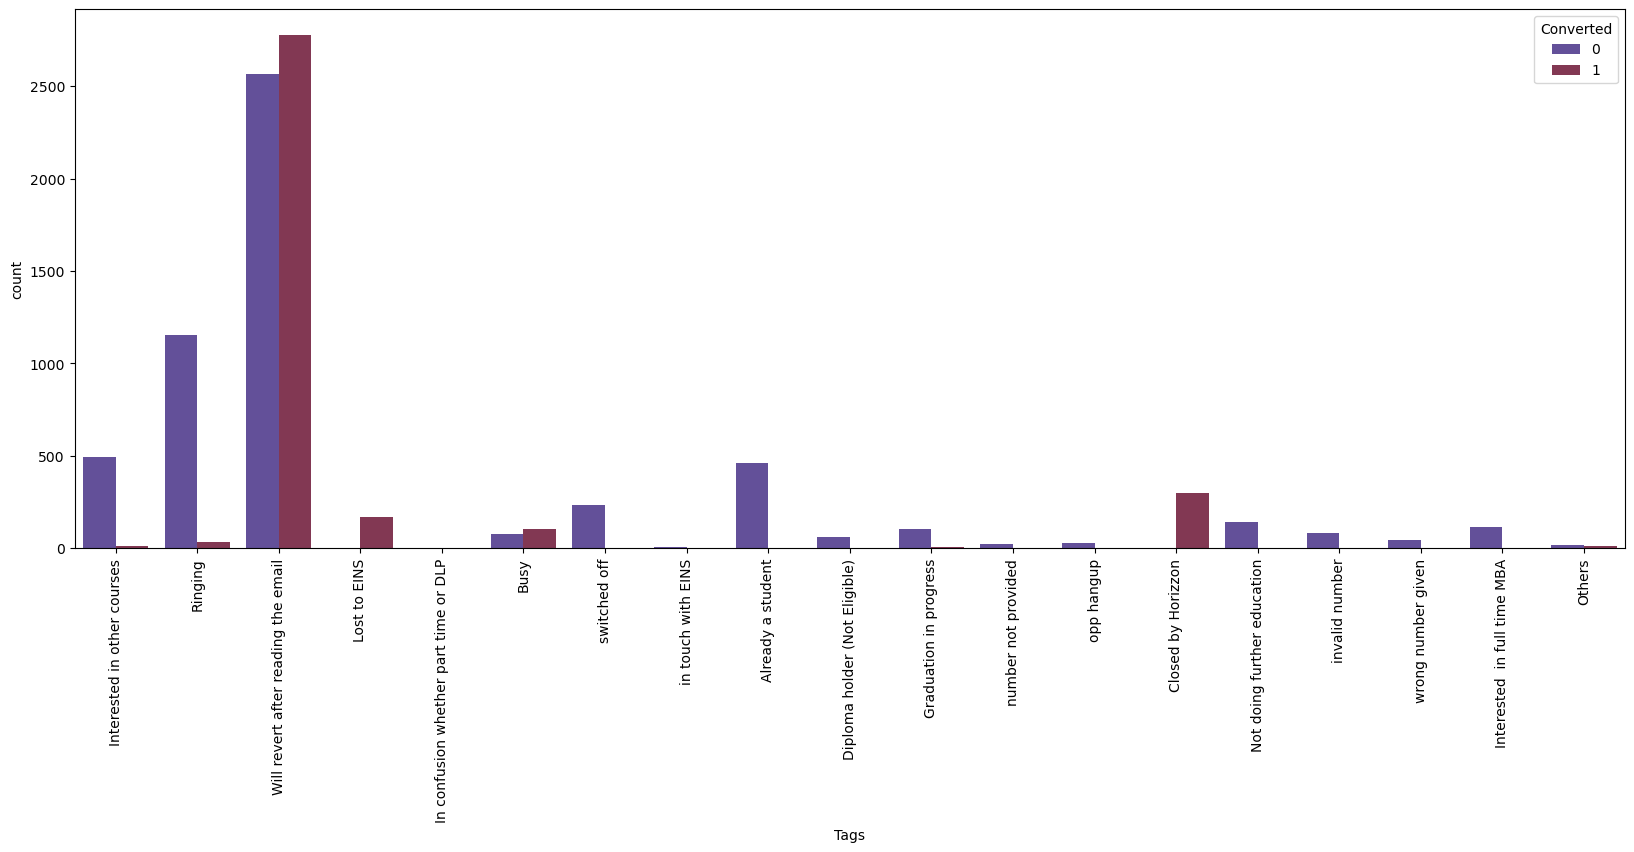

In [59]:
# To plot new categories
plot_categ_var(categ_var[17])

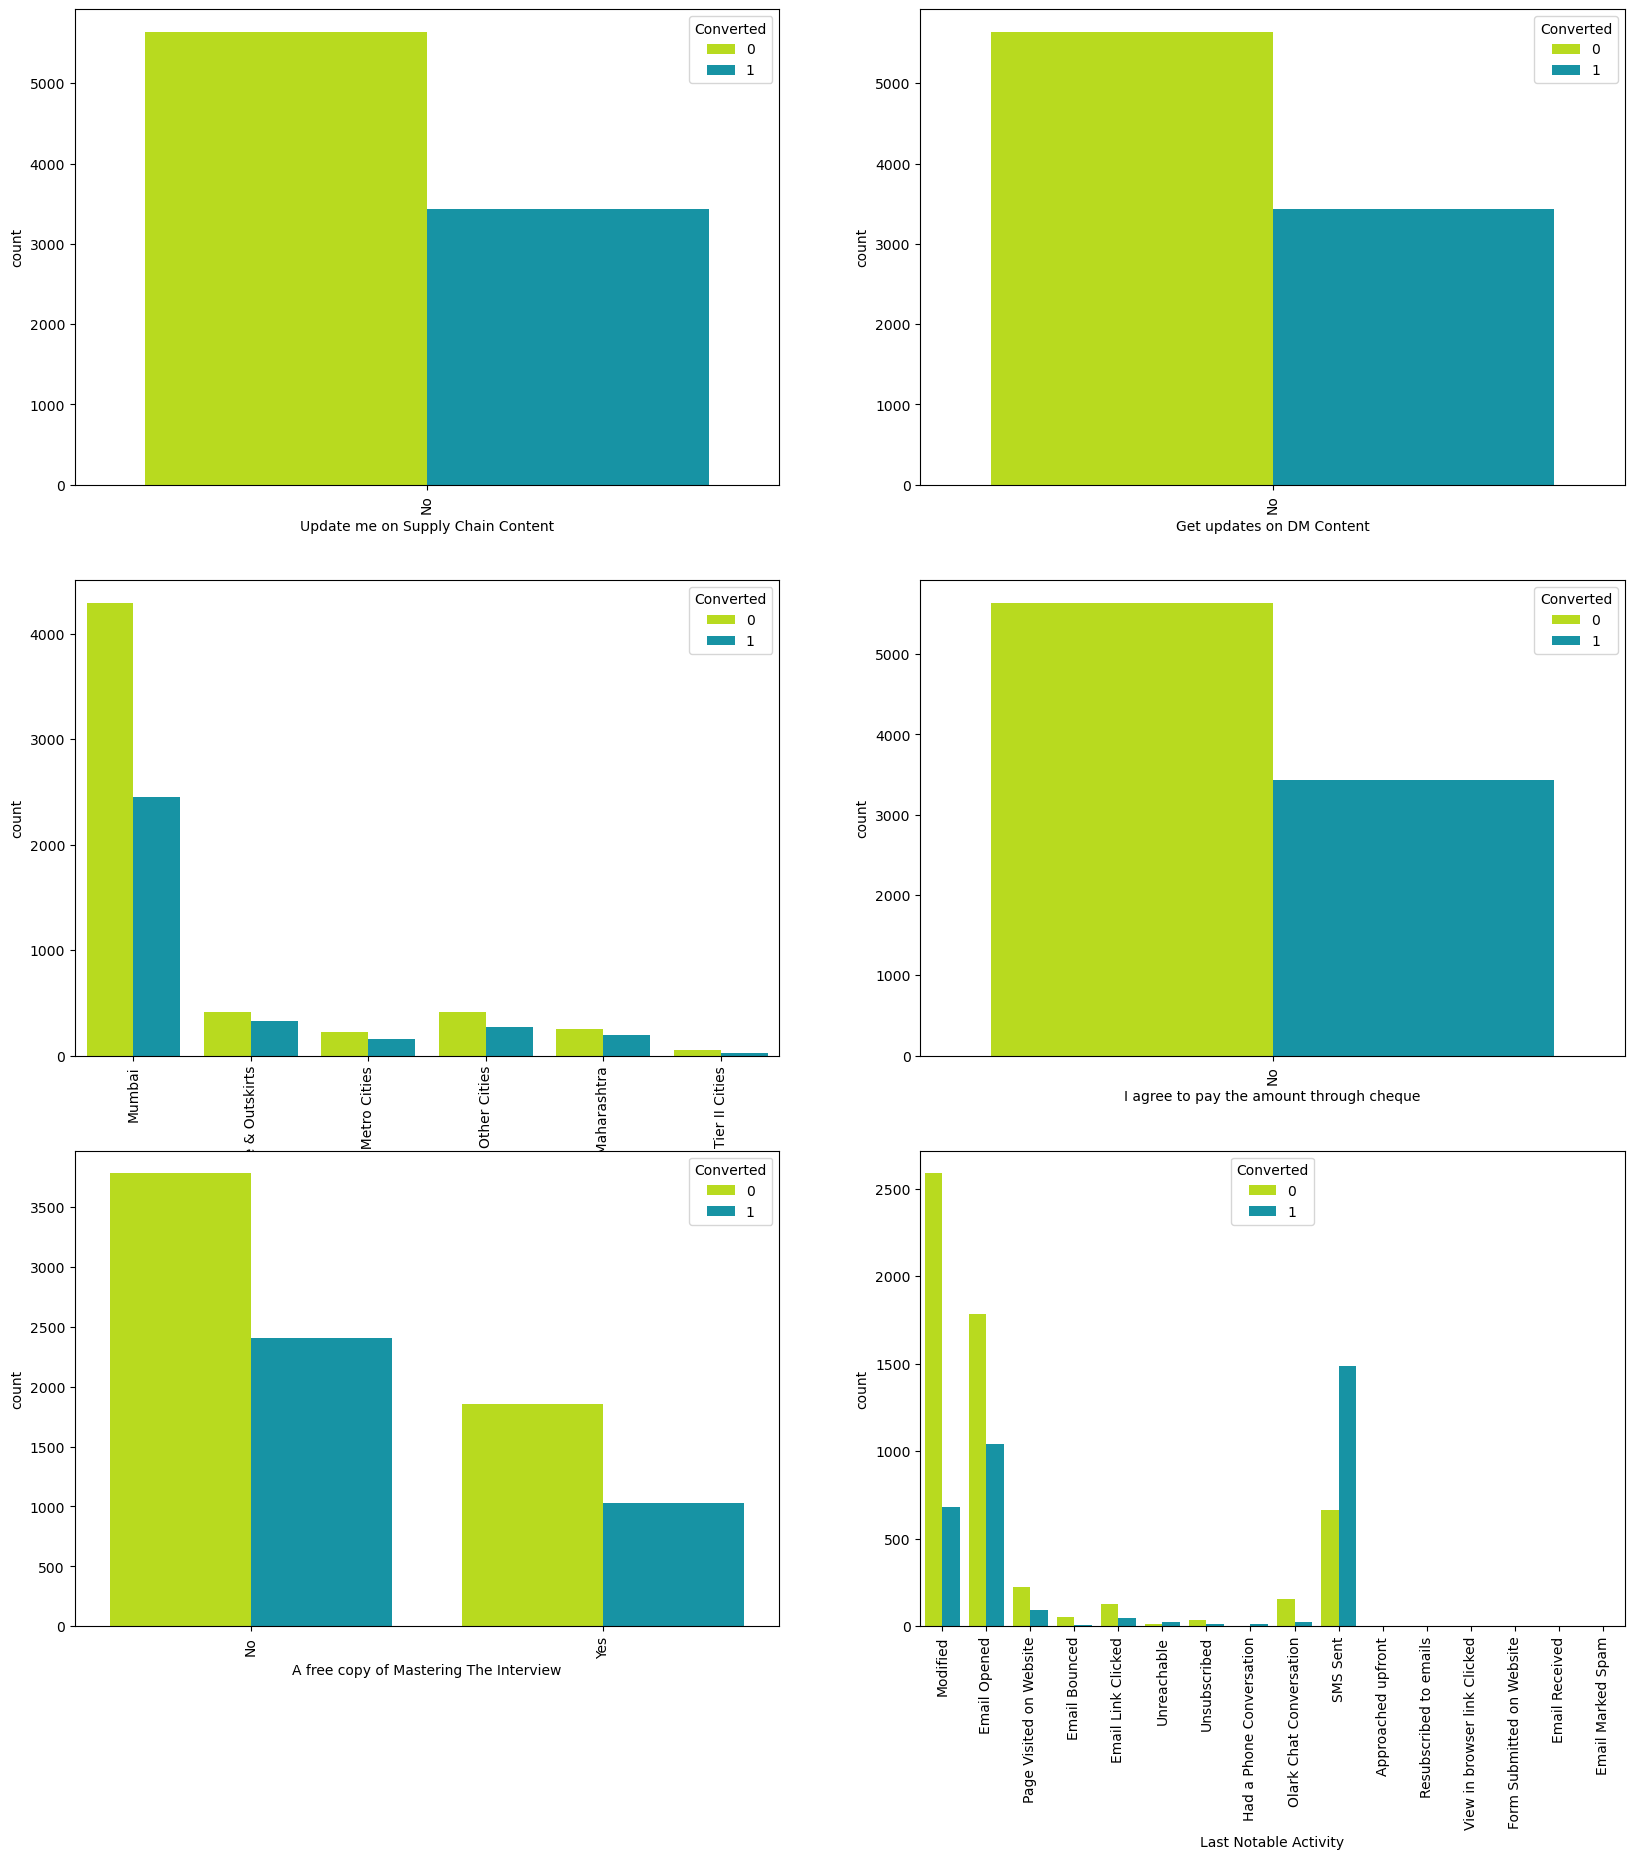

In [60]:
plot_categ_vars(categ_var[19:25])

> Observations for Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, and Last Notable Activity :

1) Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'.

2) In City, most of the leads are generated for 'Mumbai'.

3) In 'A free copy of Mastering The Interview', both categories have similar conversion rates.

4) In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [61]:
categories = lead['Last Notable Activity'].unique()
categories


array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

> We can see that we do not require last six categories.



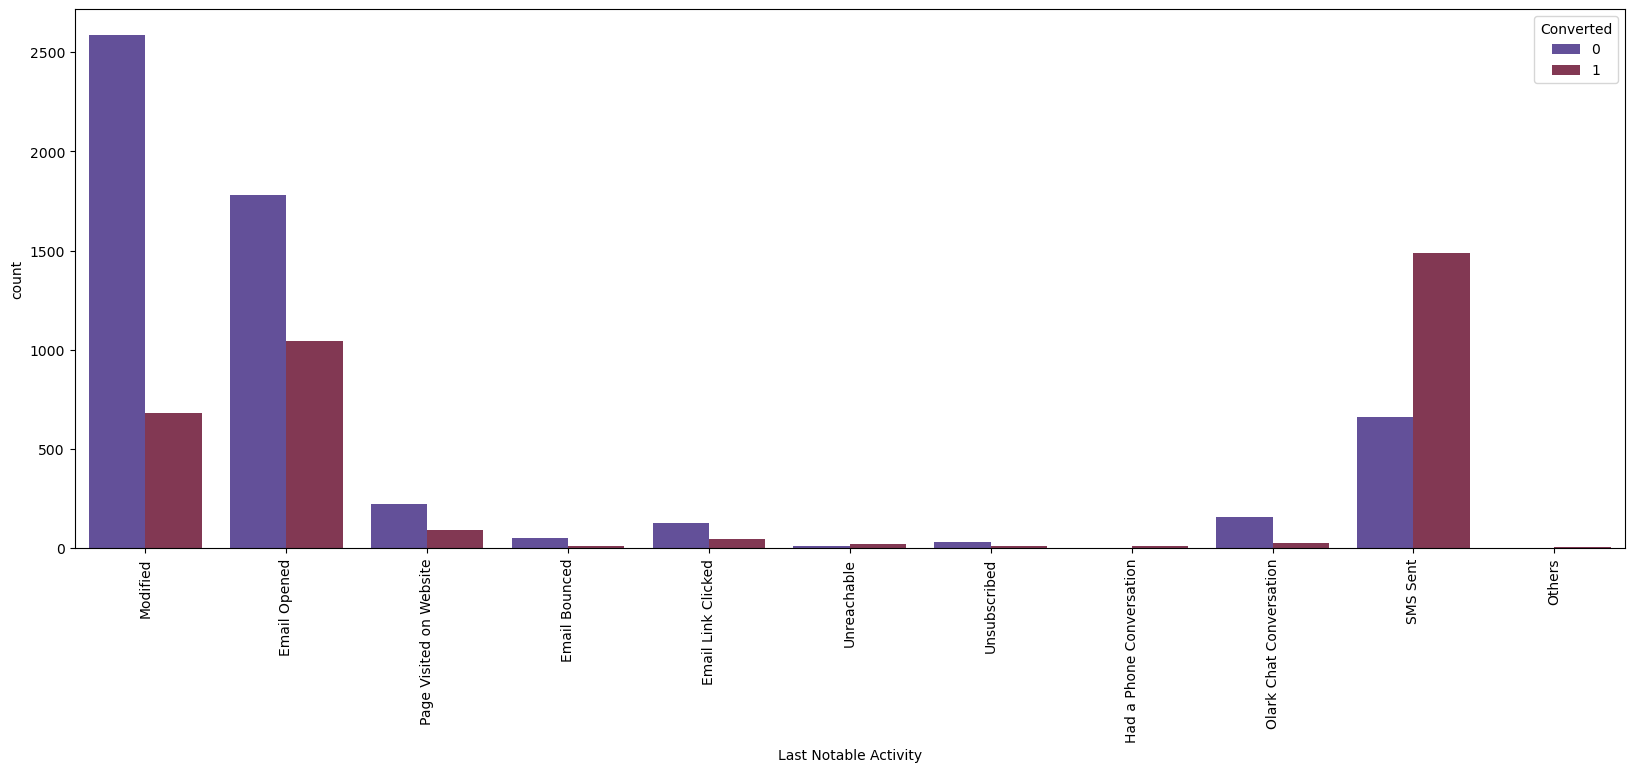

In [62]:
# To reduce categories
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(categories[-6:], 'Others')

# To plot new categories
plot_categ_var(categ_var[24])

> Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [63]:
lead = lead.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                 'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque',
                 'A free copy of Mastering The Interview'], axis = 1)

lead.head(5)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [64]:
lead.shape

(9074, 15)

In [65]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   int64  
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  Lead Quality        

In [66]:
lead.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.191867,482.887481,2.265943
std,23348.029512,0.485053,2.780618,545.256560,1.790991
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000


#### DATA PREPARATION

##### Dummy Variable creation

>For categorical variables with multiple levels, we create dummy features (one-hot encoded).


In [67]:
categ_var = list(lead.columns[lead.dtypes == 'object'])
categ_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [68]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(lead[categ_var], drop_first=True)

# To add result to the original dataframe
lead = pd.concat([lead, dummy], axis=1)

# To drop the original variables
lead = lead.drop(categ_var, axis=1)

In [69]:
lead.head(5)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


##### Train-Test Split

In [70]:
# Importing required package
from sklearn.model_selection import train_test_split

In [71]:
# To put feature variable to X
X = lead.drop(['Converted'], axis=1)

X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [72]:
# To put response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Feature Scaling

In [74]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
# Numerical variables
numeric_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [76]:
#Applying scaler to all numerical columns
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,630949,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,649355,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,579735,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4750,614238,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,588625,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [77]:
# To check the conversion rate
conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion

37.85541106458012

> We have 37.85% conversion rate.

### Building the Model
>After the creation of dummy variables, we have a large number of features. It is better to use RFE first for feature elimination.

##### Selection using RFE

In [78]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 10)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
# To check output of RFE
rfe.support_


array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', False, 3),
 ('Lead Origin_Lead Import', False, 78),
 ('Lead Source_Facebook', False, 74),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 77),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Welingak Website', False, 19),
 ('Do Not Email_Yes', False, 12),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 21),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Had a Phone Conversation', False, 50),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Others', False, 54),
 ('Last Activity_Page Visite

In [82]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [83]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Manage

In [84]:
#Assessing the Model with StatsModels
import statsmodels.api as sm

In [85]:
# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)


In [87]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final


In [88]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [89]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

> Model 1


> Running the first model by using the features selected by RFE



In [90]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2281.8
Date:                Sun, 16 Apr 2023   Deviance:                       4563.6
Time:                        21:50:15   Pearson chi2:                 7.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4591
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [91]:
col1 = col.drop('Lead Quality_Might be', 1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2282.6
Date:                Sun, 16 Apr 2023   Deviance:                       4565.1
Time:                        21:50:16   Pearson chi2:                 7.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4589
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

> All of the features have p-value are zero i.e. they all seem significant.

> We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.



In [92]:
check_VIF(X2)

,Features,VIF
0,Lead Number,14.05
3,What is your current occupation_Unemployed,11.60
8,Last Notable Activity_SMS Sent,6.25
2,Last Activity_SMS Sent,5.92
6,Lead Quality_Not Sure,3.53
5,Tags_Will revert after reading the email,3.43
7,Last Notable Activity_Modified,2.23
4,Tags_Ringing,1.63
1,Total Time Spent on Website,1.06


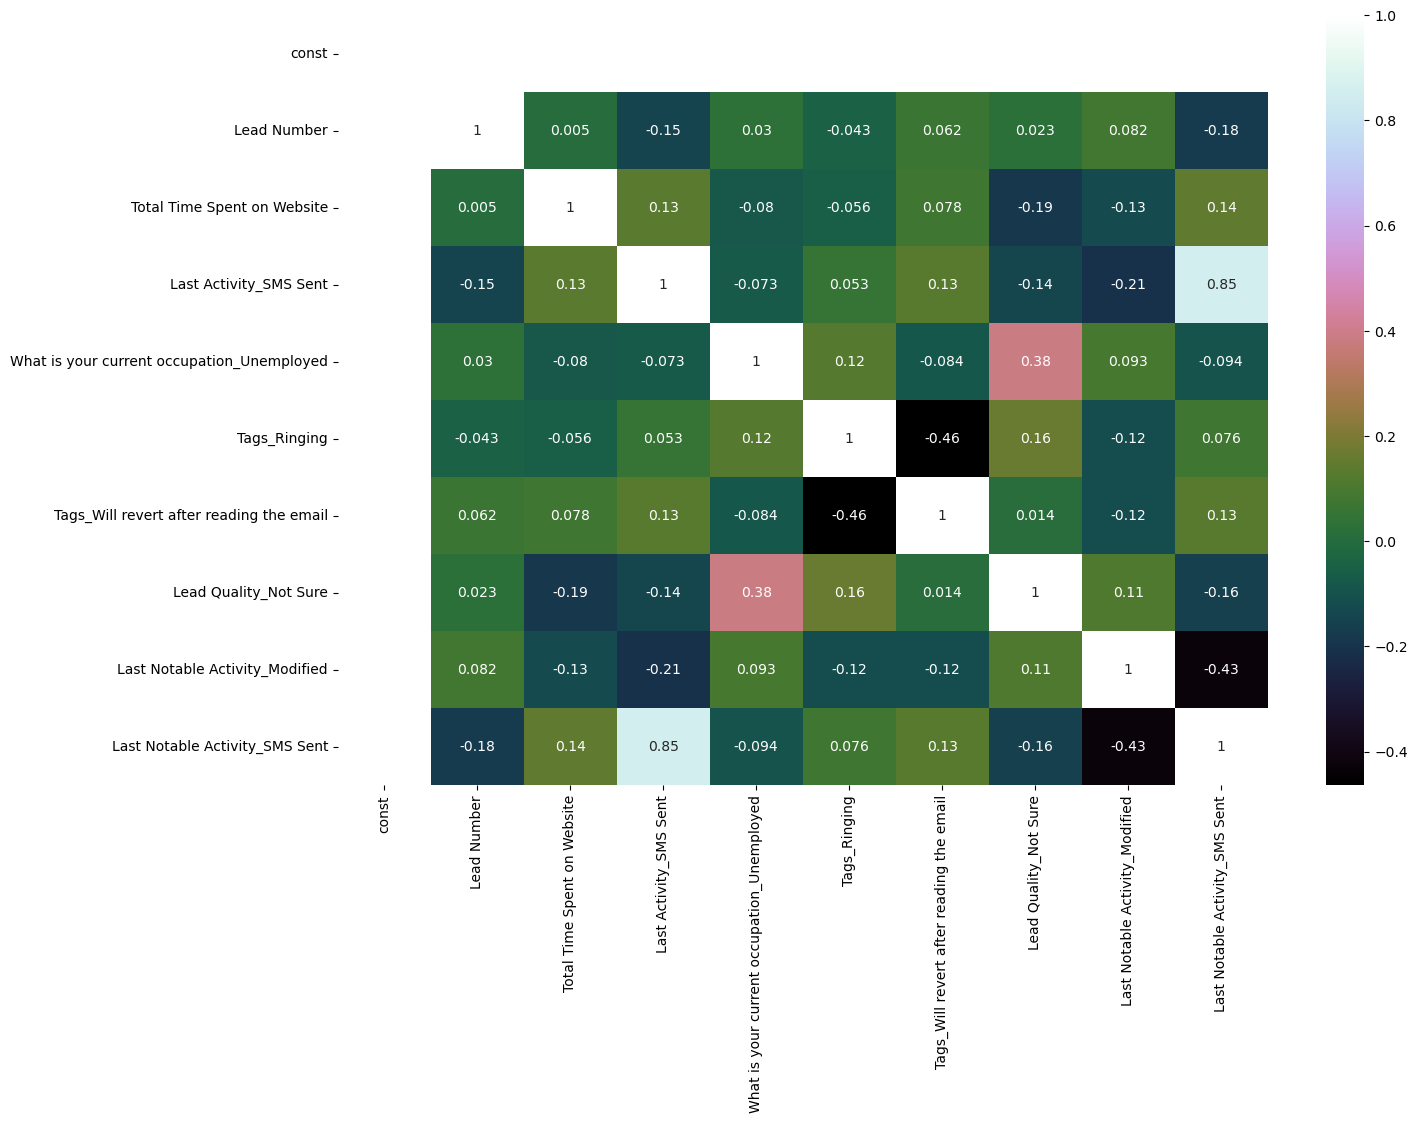

In [93]:
# To plot correlations

plt.figure(figsize = (15,10))  
sns.heatmap(X2.corr(), annot = True, cmap='cubehelix', linecolor='black')
plt.show()

>From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.



In [94]:
# To get predicted values on train set
y_train_pred_final = get_pred(X2,logm2)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.285170,3009,0
1,0,0.475123,1012,0
2,0,0.001448,9226,0
3,1,0.914299,4750,1
4,1,0.256726,7987,0


In [95]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)


Confusion Matrix:
[[3567  338]
 [ 559 1887]]
Training Accuracy:  0.8587623996221068


##### This is our final model:

>1) All p-values are very close to zero.

>2) VIFs for all features are very low. There is hardly any multicollinearity present.

>3) Training accuracy of 85.87% at a probability threshold of 0.05 is also good.

In [96]:
#Checking other metrics beyond simply Accuracy.

In [97]:
other_metrics(confusion)

Sensitivity:  0.7714636140637776
Specificity:  0.9134443021766966
False postive rate - predicting the lead conversion when the lead does not convert:  0.08655569782330345
Positive predictive value:  0.8480898876404495
Negative predictive value:  0.8645176926805623


#### Plotting the ROC Curve
> An ROC curve demonstrates several things:

>It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

>The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

>The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [98]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)


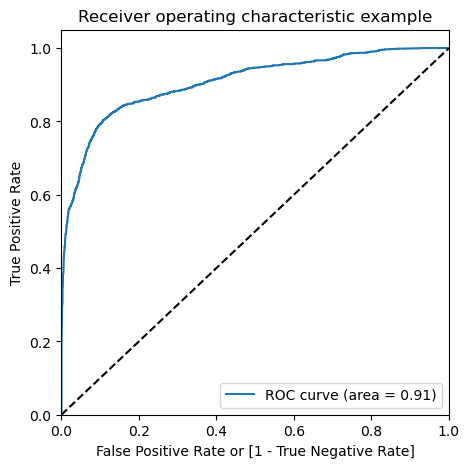

In [100]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [101]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9069409095620329


###### Area under curve:  0.9488012517235278
> Area under curve (auc) is approximately 0.95 which is very close to ideal auc of 1.

### Finding Optimal Cutoff Point

> Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.



In [102]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.285170,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.475123,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.001448,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.914299,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.256726,7987,0,1,1,1,0,0,0,0,0,0,0


In [103]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.640372  0.952984  0.444558
0.2   0.2  0.752008  0.892478  0.664020
0.3   0.3  0.833727  0.847915  0.824840
0.4   0.4  0.854983  0.810303  0.882971
0.5   0.5  0.858762  0.771464  0.913444
0.6   0.6  0.848528  0.704415  0.938796
0.7   0.7  0.828216  0.611202  0.964149
0.8   0.8  0.814045  0.543745  0.983355
0.9   0.9  0.771532  0.415781  0.994366


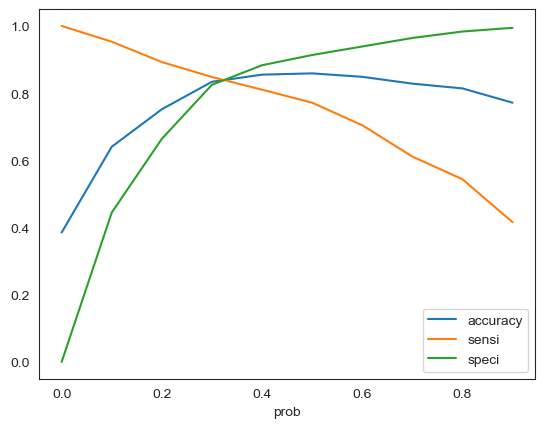

In [104]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


> From the curve above, 0.37 is the optimum point to take as a cutoff probability.



In [105]:
# Using 0.37 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.285170,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.475123,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.001448,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.914299,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.256726,7987,0,1,1,1,0,0,0,0,0,0,0,0


In [106]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)


Confusion Matrix:
[[3448  457]
 [ 464 1982]]
Training Accuracy:  0.8549834671705243


In [107]:
!pip install mlxtend


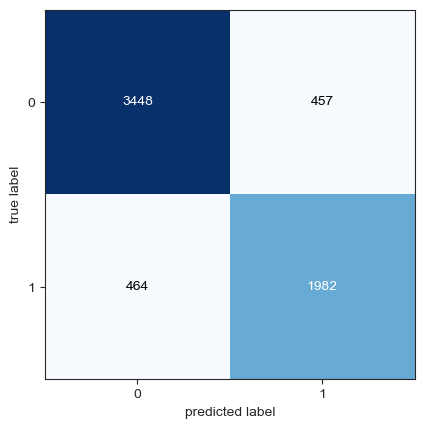

In [108]:
# To plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
plt.show()

In [109]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.8103025347506132
Specificity:  0.8829705505761843
False postive rate - predicting the lead conversion when the lead does not convert:  0.11702944942381562
Positive predictive value:  0.8126281262812628
Negative predictive value:  0.8813905930470347


> Classification Report


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3905
           1       0.81      0.81      0.81      2446

    accuracy                           0.85      6351
   macro avg       0.85      0.85      0.85      6351
weighted avg       0.85      0.85      0.85      6351



#### Precision and Recall

> Precision = TP / TP + FP



In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.8480898876404495

In [112]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7714636140637776

In [113]:
# Using sklearn utilities for the same:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)



0.8480898876404495

In [114]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.7714636140637776

#### Precision and Recall Tradeoff


In [115]:
from sklearn.metrics import precision_recall_curve


In [116]:
y_train_pred_final.Converted, y_train_pred_final.predicted


(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


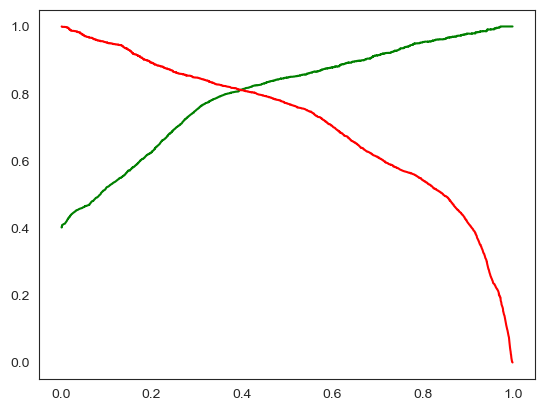

In [118]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

> From the curve above, 0.4 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.



In [119]:
# Using 0.4 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.285170,3009,0,1,1,1,0,0,0,0,0,0,0,0,1
1,0,0.475123,1012,0,1,1,1,1,1,0,0,0,0,0,1,1
2,0,0.001448,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.914299,4750,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.256726,7987,0,1,1,1,0,0,0,0,0,0,0,0,1


In [120]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[2969  936]
 [ 330 2116]]
Training Accuracy:  0.8006613131790269


In [121]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.8650858544562551
Specificity:  0.7603072983354674
False postive rate - predicting the lead conversion when the lead does not convert:  0.23969270166453266
Positive predictive value:  0.6933158584534731
Negative predictive value:  0.8999696877841771


> Accuracy and other metrics yield  almost similar values for both the cutoffs. We'll use the cutoff of 0.4 as derived earlier for predictions on the test set.



### Making Predictions on the Test Set


In [122]:
# Feature transform on Test set
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,628652,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,644500,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,588935,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,619437,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,623381,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [123]:
# To get final features
X_test_sm = X_test[col1]

In [124]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [125]:
# Making predictions
y_test_pred = logm2.predict(X_test_sm)


In [126]:
y_test_pred[:10]


3271    0.220289
1490    0.980685
7936    0.155157
4216    0.299261
3830    0.214822
1800    0.870946
6507    0.013320
4821    0.092781
4223    0.937838
4714    0.193619
dtype: float64

In [127]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.220289
1490,0.980685
7936,0.155157
4216,0.299261
3830,0.214822


In [128]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [129]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [130]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.220289
1,1,1490,0.980685
2,0,7936,0.155157
3,1,4216,0.299261
4,0,3830,0.214822


In [132]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.220289
1,1,1490,0.980685
2,0,7936,0.155157
3,1,4216,0.299261
4,0,3830,0.214822


In [133]:
# To put the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.220289,1
1,1,1490,0.980685,1
2,0,7936,0.155157,0
3,1,4216,0.299261,1
4,0,3830,0.214822,1


In [134]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))


Area under curve:  0.8895958192948267


In [135]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1119  615]
 [ 128  861]]
Training Accuracy:  0.7271391847227323


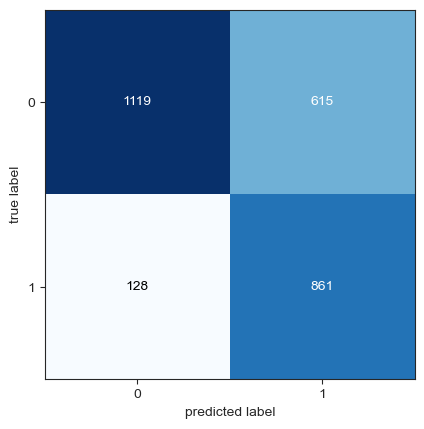

In [136]:
# To plot confusion matrix
plot_confusion_matrix(conf_mat=confusion_test)
plt.show()

In [137]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8705763397371082
Specificity:  0.6453287197231834
False postive rate - predicting the lead conversion when the lead does not convert:  0.3546712802768166
Positive predictive value:  0.5833333333333334
Negative predictive value:  0.8973536487570168


In [138]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))


              precision    recall  f1-score   support

           0       0.90      0.65      0.75      1734
           1       0.58      0.87      0.70       989

    accuracy                           0.73      2723
   macro avg       0.74      0.76      0.72      2723
weighted avg       0.78      0.73      0.73      2723



> Conclusion:-

> 1) All p-values are very close to zero.

> 2) VIFs for all features are very low. There is hardly any multicollinearity present.

> 3) The overall testing accuracy of 80.06% at a probability threshold of 0.4.